# Credit Score Classification

#### Problem Statement

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [2]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### import 'stats' package from scipy library
from scipy import stats

### import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

### Feature Encoding
from sklearn.preprocessing import OrdinalEncoder

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.model_selection import GridSearchCV


### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize']=[15,8]

### 2. Importing the data

In this section, we will fetch the dataset that is available in the Kaggle.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each customer. Your model will be based on “features” like customer’s age and occupation. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each customer. It is your job to predict these outcomes. For each customer in the test set, use the model you trained to predict the bracket of their credit score (Poor, Standard, Good).

In [4]:
### Fetching the dataset

df = pd.read_csv('creditscoredata.csv')

In [5]:
### Looking at the sample data in the dataset

df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [6]:
### Shape of the dataset

df.shape

(100000, 28)

The dataset consists of 28 columns and 100000 rows.

### 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns and numerical columns of the dataset.

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [7]:
### Looking at the datatypes of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

From the above data, we can see that there are a few columns that have an improper datatype. The columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance are object datatyped but they should be a number datatype like int or float.

Now, we will make sure that we will change the datatype of these columns from object to a numerical datatype like int or float.

In [8]:
## Data cleaning - Removing junk values

for i in df.describe(include=object).columns:
    df[i] = df[i].str.strip('_')
    df[i] = df[i].replace('',np.NaN)
    df[i] = df[i].replace(['nan','!@9#%8','#F%$D@*&8'],np.NaN)

Now, we have removed all the underscores (_) and speacial characters in the data. Now, let's look at the datatypes of the columns in the datasets and focus on correcting them.

In [9]:
df['Age'] = df['Age'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [10]:
### Looking at the datatypes of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

From the above data, we can see that that the datatype of the columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance have changed from Object to Float. We also see that there are missing values in the dataset. Now, lets look at the columns that have missing values.

In [11]:
### Missing data by columns in the dataset

df.isnull().sum().sort_values(ascending = False)

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
SSN                          5572
Amount_invested_monthly      4479
Monthly_Balance              2868
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Outstanding_Debt                0
ID                              0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

From the above data, we can see that there are missing values in the columns - Credit_Mix, Monthly_Inhand_Salary, Type_of_Loan, Name, Credit_History_Age, Payment_Behaviour, Occupation, Num_of_Delayed_Payment, SSN, Amount_invested_monthly, Changed_Credit_Limit, Num_Credit_Inquiries, Monthly_Balance. 

Now, lets look where these missing values are present in these columns i.e., whether these values are clustered at a single place or scattered in the data.

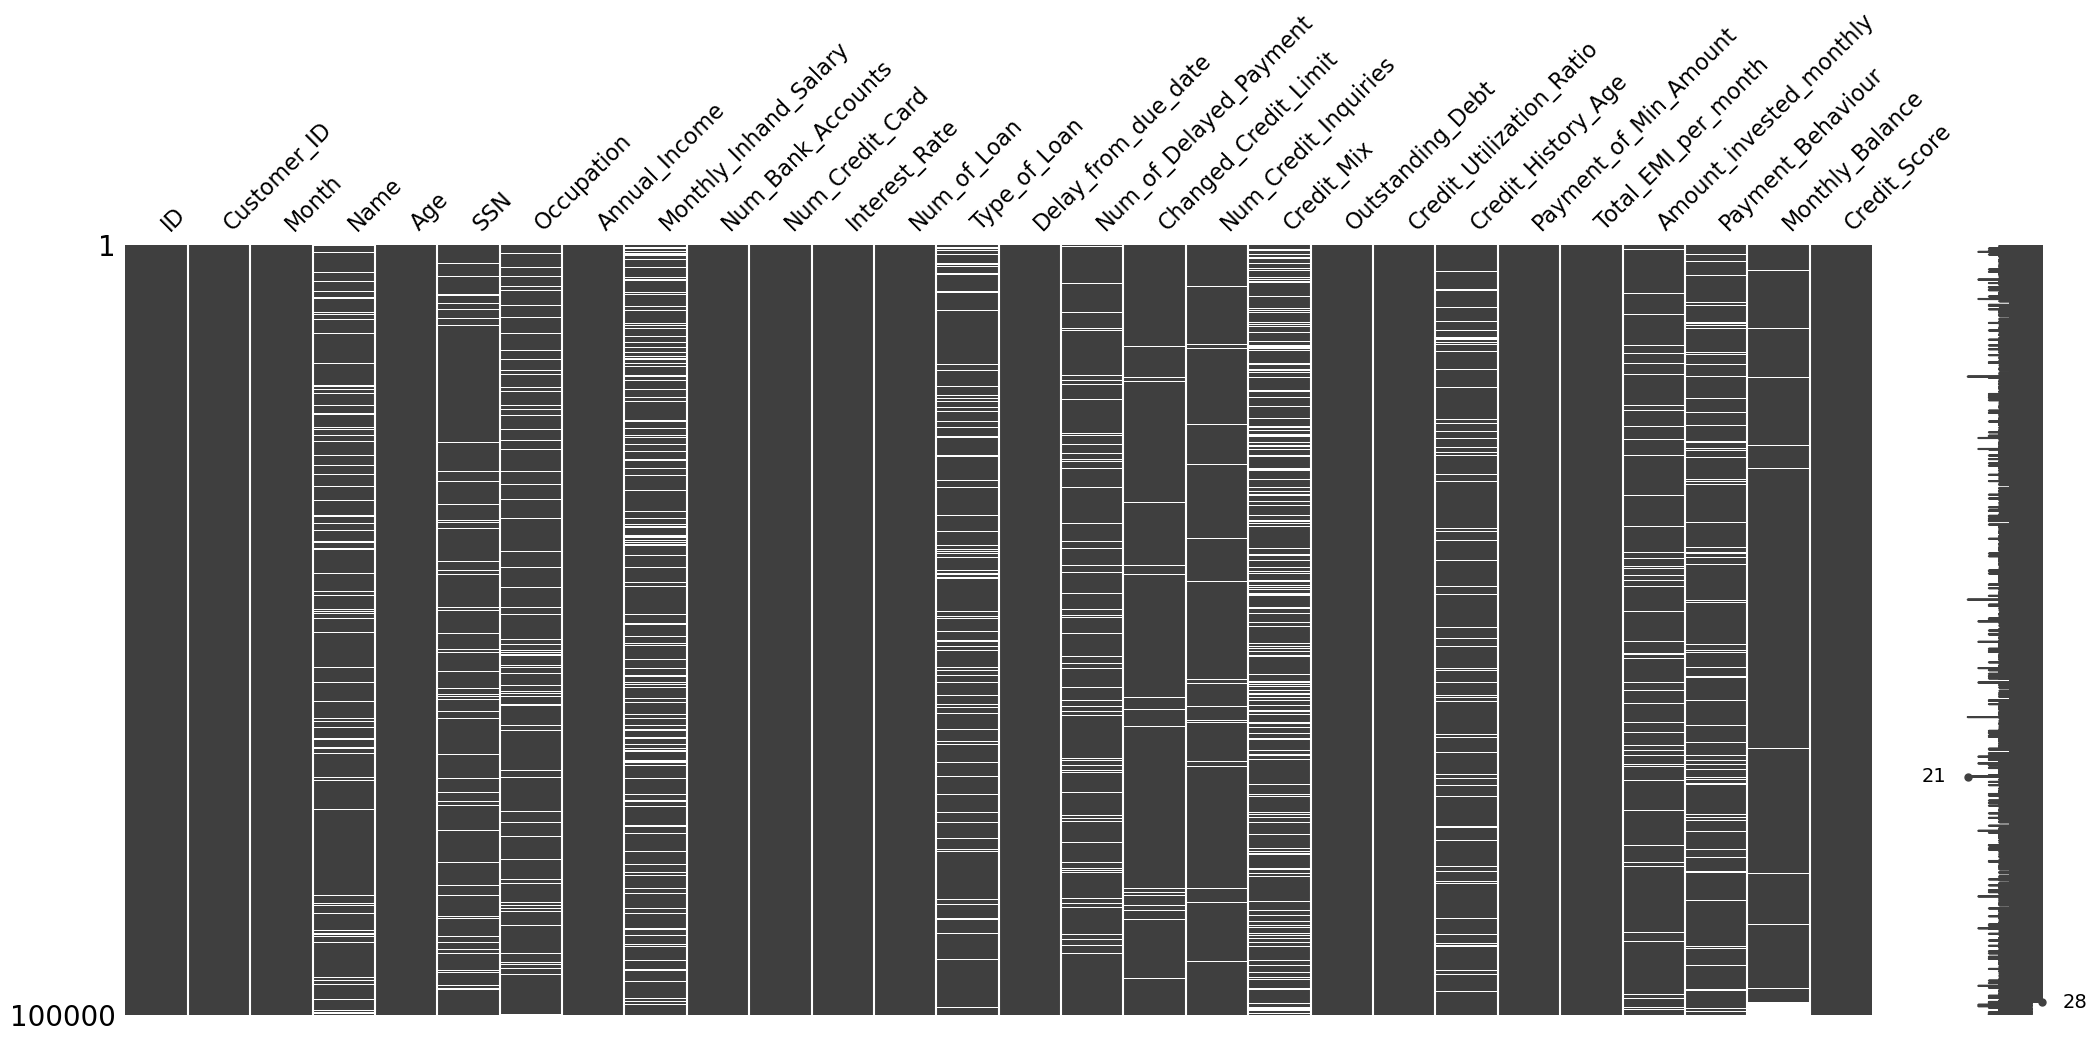

In [12]:
### Visual representation of the missing data in the dataset

missingno.matrix(df)
plt.show()

From the above data, we can see that the missing values in the data are scattered, not clustered at a single place.

In [13]:
### Summary statistics of the numerical columns in the dataset

df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.088580e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.699858e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.364493e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696405e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


From the above summary statistics, we can see that there are outliers present in the data. We will take care of these in the next sections.

In [14]:
### Summary statistics of the categorical columns in the dataset

df.describe(include=object)

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,90015,94428,92938,88592,79805,90970,100000,92400,100000
unique,100000,12500,8,10139,12500,15,6260,3,404,3,6,3
top,0x1602,CUS_0xd40,January,Langep,078-73-5990,Lawyer,Not Specified,Standard,15 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12500,44,8,6575,1408,36479,446,52326,25513,53174


From the above summary statistics, we can infer that every record in ID column is unique.
For each customer, we have data for 8 different months.
There are subcategories in columns like Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Type_of_Loan, Occupation.
In Type_of_Loan feature, most frequently occurring value is 'Not specified'.

#### 3.2 Feature Analysis

##### 3.2.1 Categorical variable - Occupation

In [15]:
### Value counts of the column - Occupation

occupation_count = df['Occupation'].value_counts(dropna = False)
occupation_count

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Text(0.5, 0, 'Occupation')

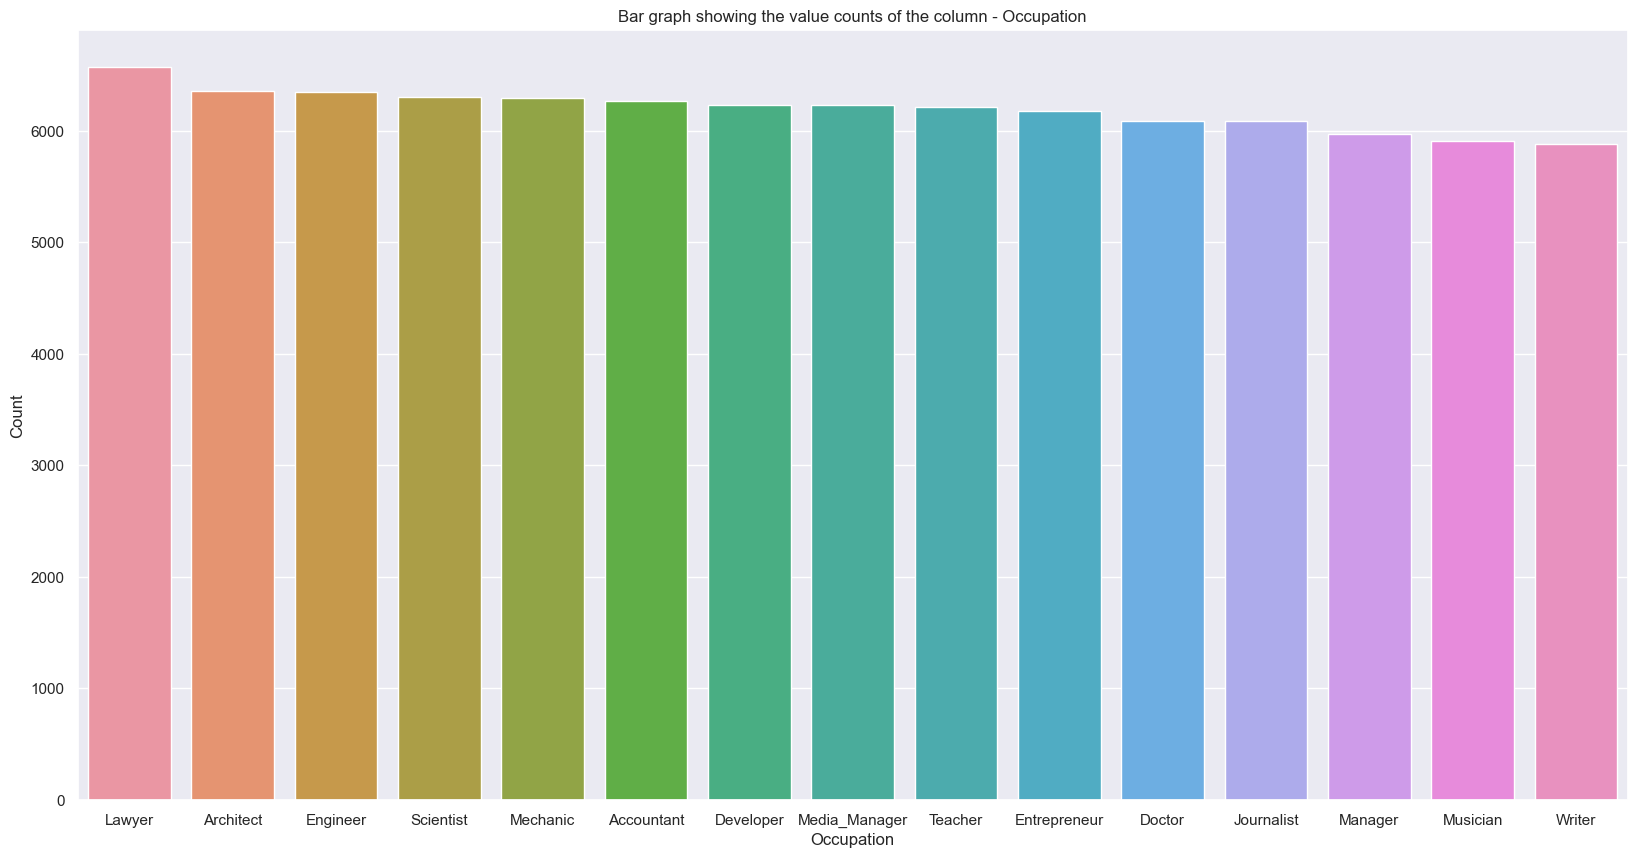

In [16]:
### Bar graph showing the value counts of the column - Occupation

sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(occupation_count.index, occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Occupation', fontsize = 12)

From the above graph, we can see that most of the customer's occupation belongs to 'Lawyer'.

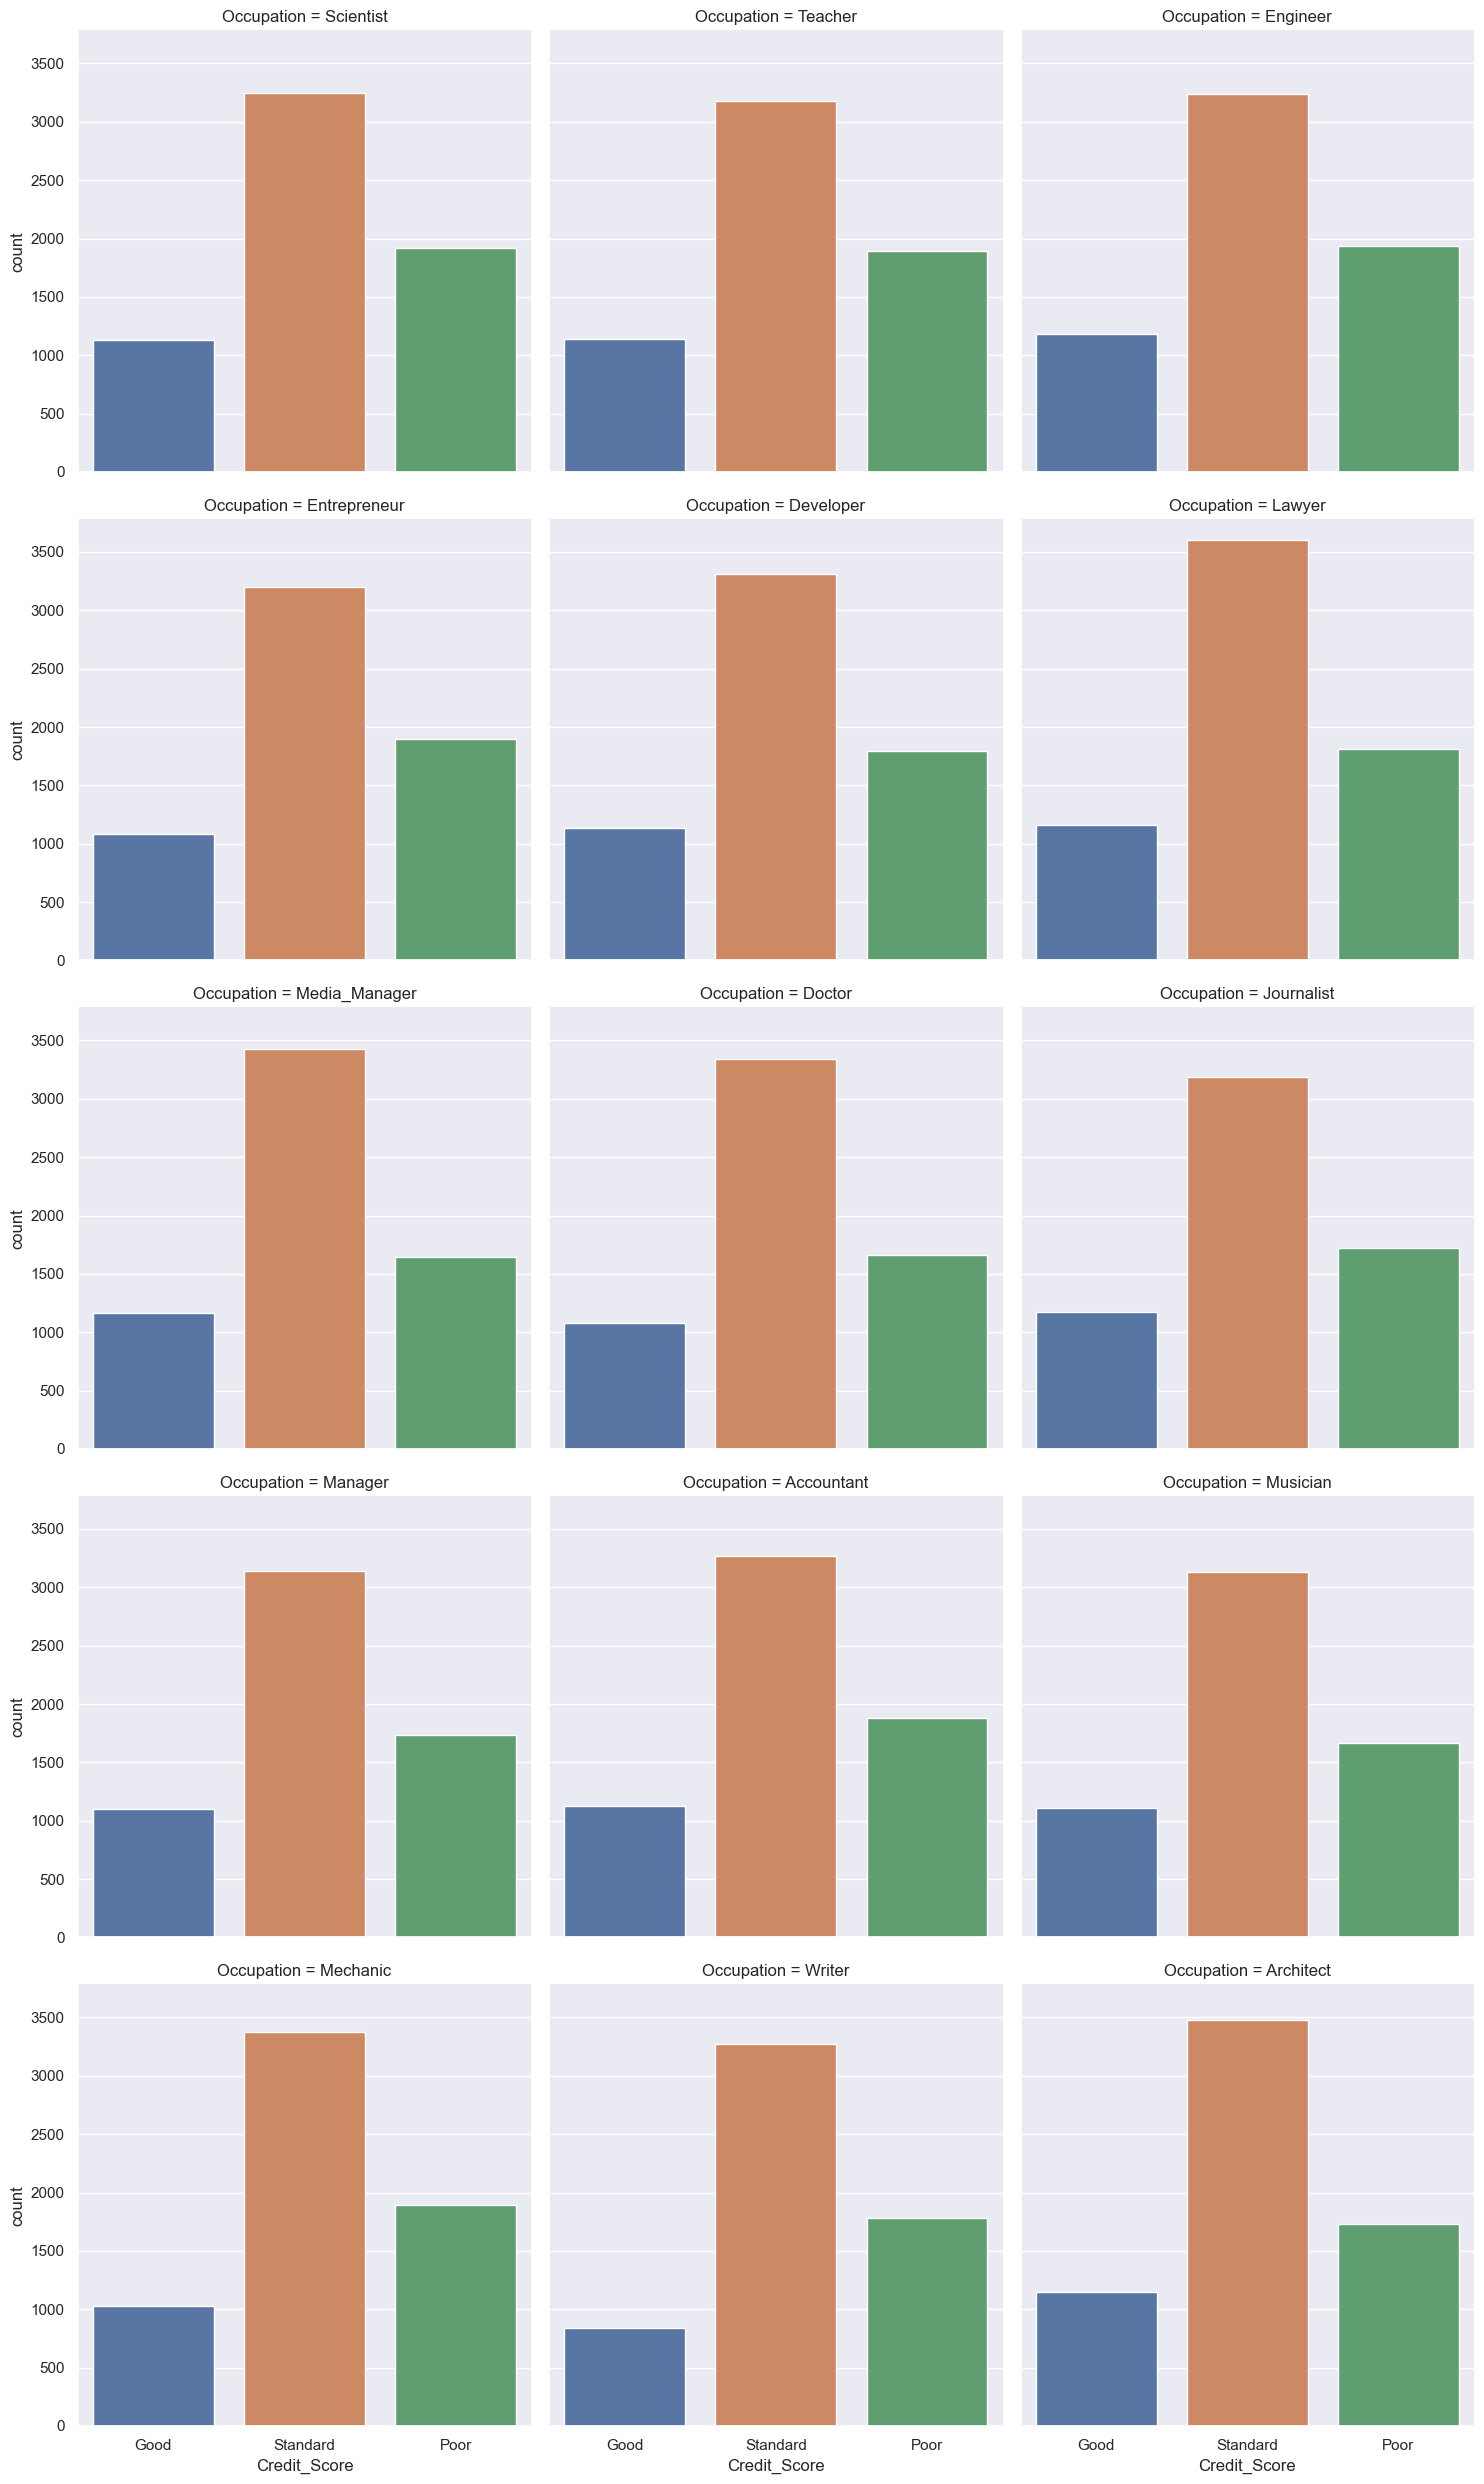

In [17]:
### Distribution of Credit_Score for each Occupation

sns.factorplot('Credit_Score', col = 'Occupation', data = df, kind = 'count',col_wrap=3)
plt.tight_layout()
plt.show()

From the above graphs, we can see that most of the people have a Credit Score in the Standard range for all the Occupations.

##### 3.2.2 Categorical variable - Type of Loan

In [18]:
### Fetching the not null data of the column - Type of Data 

index_values = ~df['Type_of_Loan'].isnull().values
loan_type_data = list(df['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [19]:
### Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

Text(0.5, 0, 'Type_of_Loan')

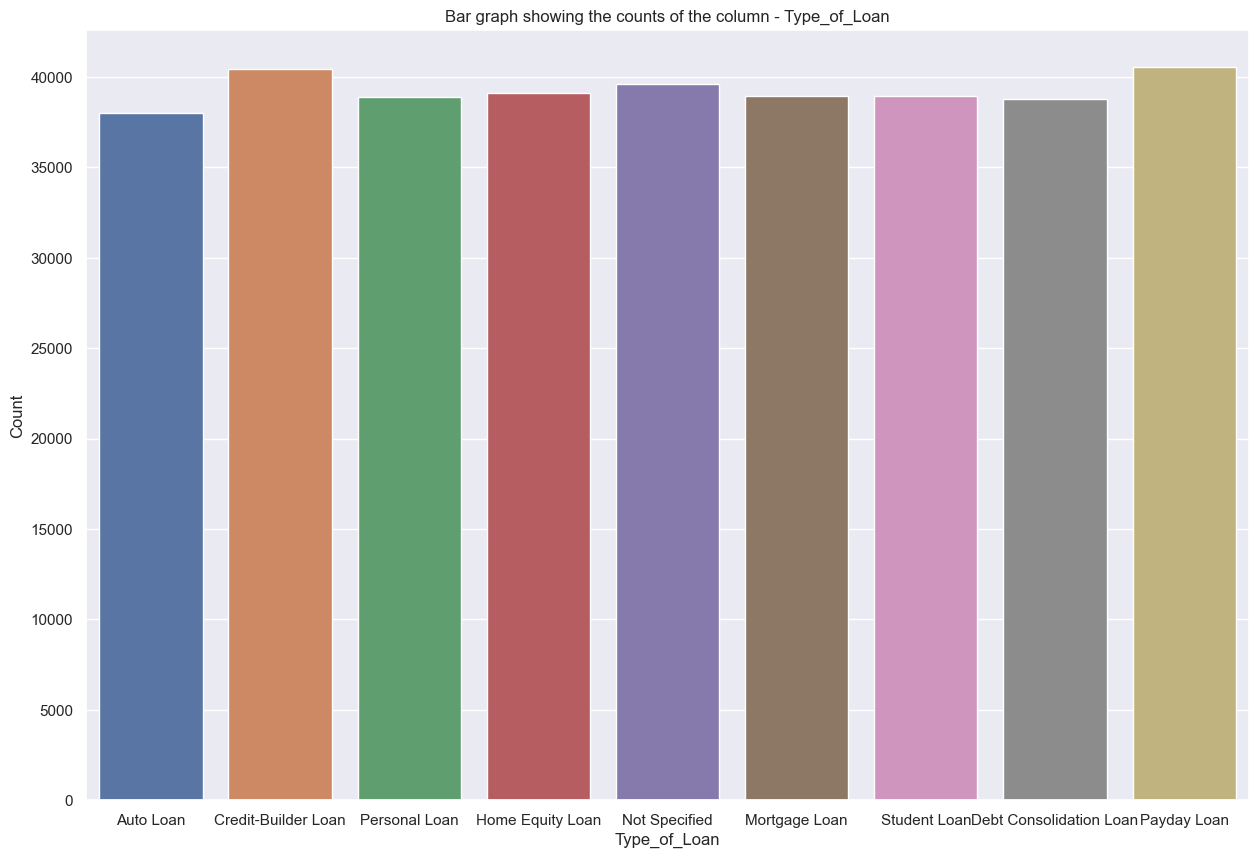

In [20]:
### Bar graph showing the counts of the column - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(list(loan_type_dict.keys()), list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

From the above graph, we can see that the Payday Loans and Credit-Builder Loans are the highest occurrences of loans among all the other loans.

##### 3.2.3 Categorical variable - Credit_MIx

In [21]:
### Value counts of the column - Credit_Mix

credit_mix_count = df['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

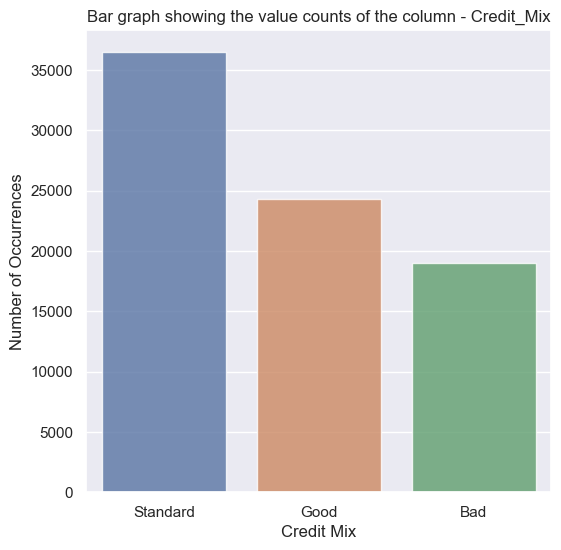

In [22]:
### Bar graph showing the value counts of the column - Credit_Mix

sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(credit_mix_count.index, credit_mix_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customers have a 'Standard' credit mix.

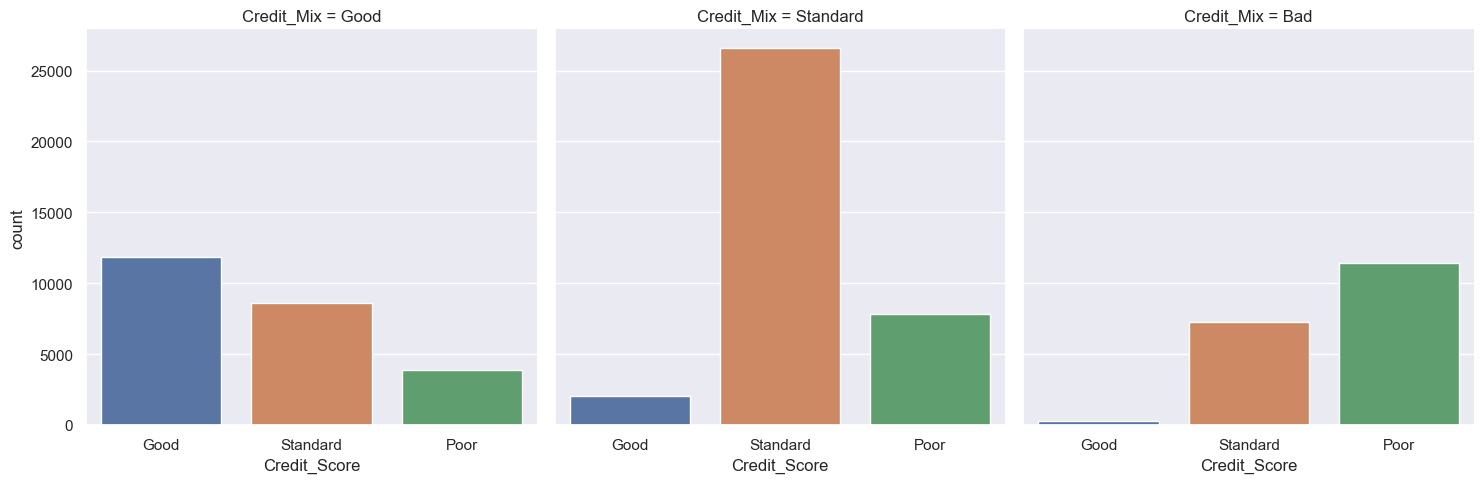

In [23]:
### Distribution of Credit_Score for each Credit_Mix

sns.factorplot('Credit_Score', col = 'Credit_Mix', data = df, kind = 'count', col_wrap = 3)
plt.show()

From the above graphs, we can see that the columns - Credit_Mix and Credit_Score are almost similar. 

##### 3.2.4 Categorical variable - Payment_of_Min_Amount

In [24]:
### Value counts of the column - Payment_of_Min_Amount

min_amount_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

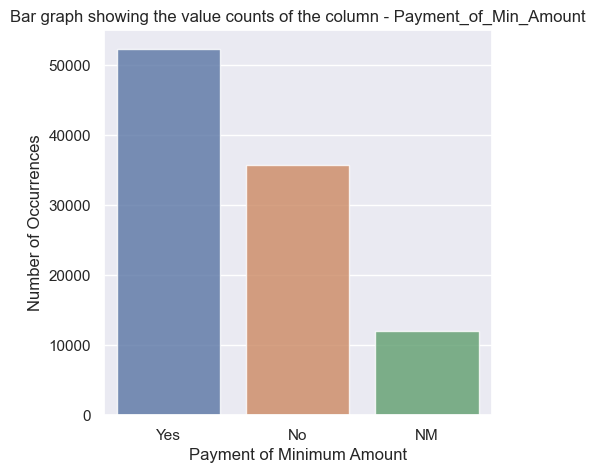

In [25]:
### Bar graph showing the value counts of the column - Payment_of_Min_Amount

sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(min_amount_count.index, min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customer's paid a minimum amount for their loans.

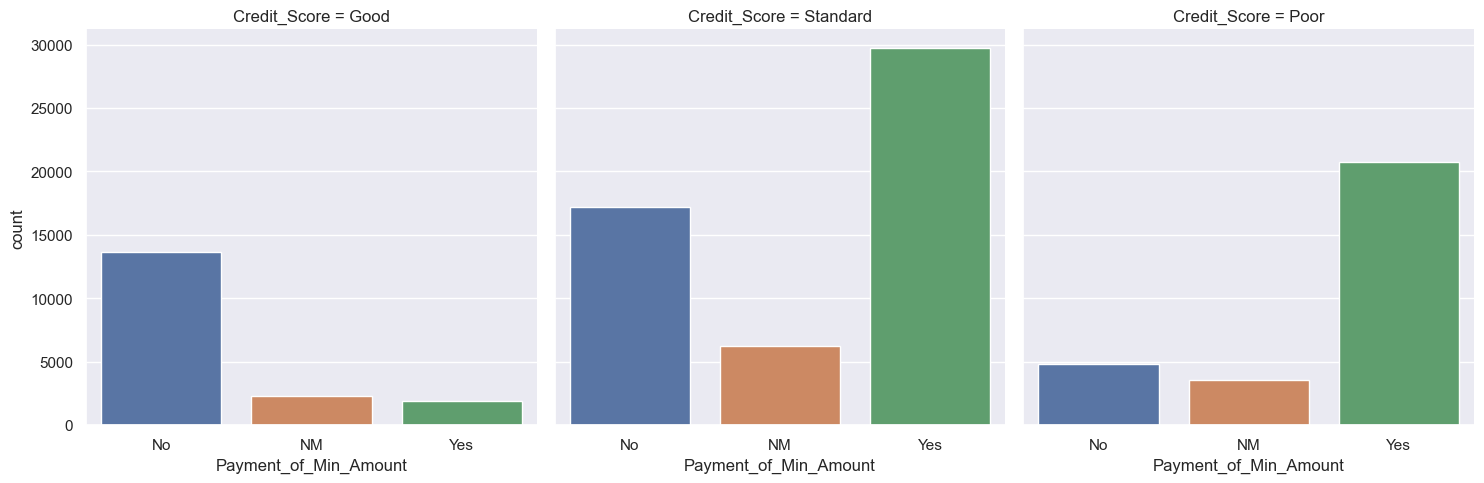

In [26]:
### Distribution of Payment_of_Min_Amount for each Credit Score

sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = df, kind = 'count', col_wrap = 3)
plt.show()

From the above graphs, we can see that the most of the customers with a good credit score didn't pay the minimum amount for the loan. Similarly, customers with a poor credit score paid the minimum amount for the loan.

##### 3.2.5 Numerical variable - Age

Text(0.5, 1.0, 'Customer Age Distribution')

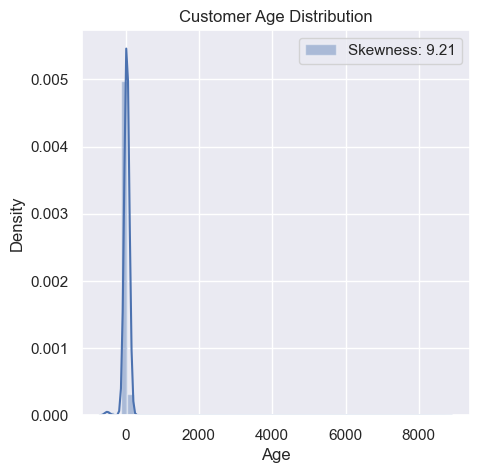

In [27]:
### Understanding the distribution of the column - Age

sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

From the above graph, we can see that the above graph has a high degree of skewness. 

##### 3.2.6 Numerical variable - Monthly_Inhand_Salary

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

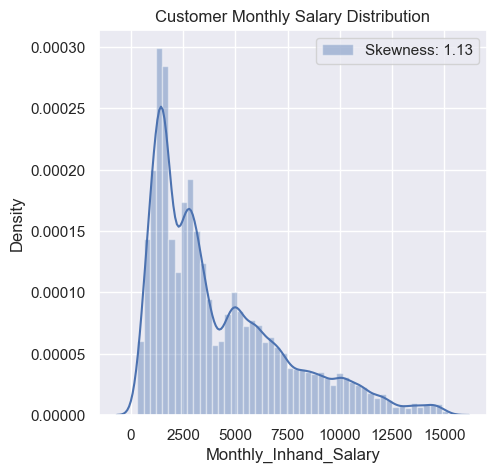

In [28]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

From the above graph, we can see that the distribution is right skewed and has a slight degree of skewness.

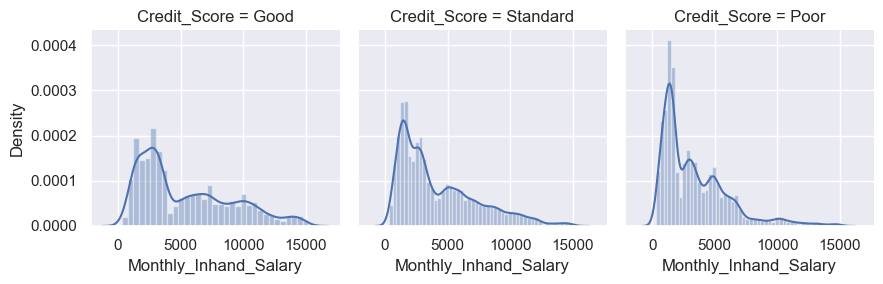

In [29]:
### Monthly Inhand Salary distribution by Credit Score

grid = sns.FacetGrid(df, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')
plt.show()

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

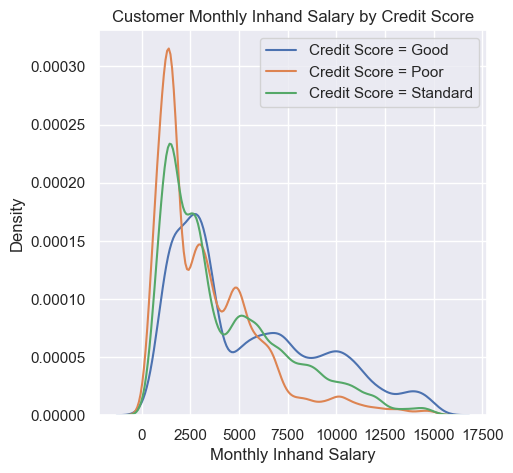

In [30]:
### Merging the above graphs into one

sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.

##### 3.2.7 Numerical variable - Interest_Rate

Text(0.5, 1.0, 'Customers Interest Rate Distribution')

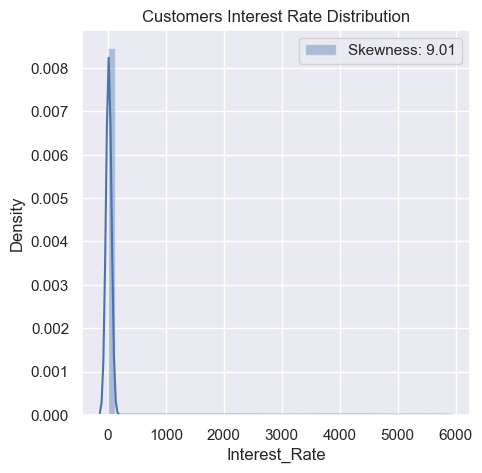

In [31]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Customers Interest Rate Distribution')

From the above graph, we can see that the above graph has a high degree of skewness.

##### 3.2.8 Numerical variable - Outstanding_Debt

Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

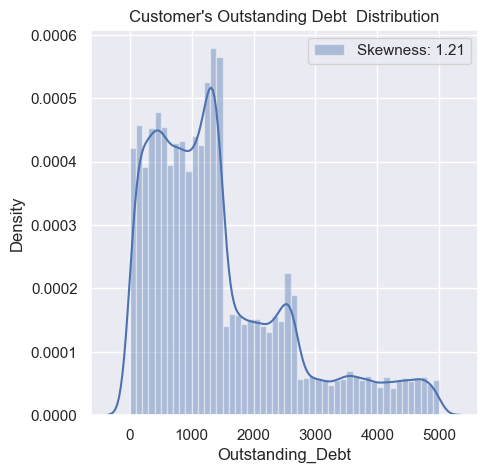

In [32]:
### Understanding the distribution of the column - Outstanding_Debt

sns.distplot(df['Outstanding_Debt'], label = 'Skewness: %.2f'%(df['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

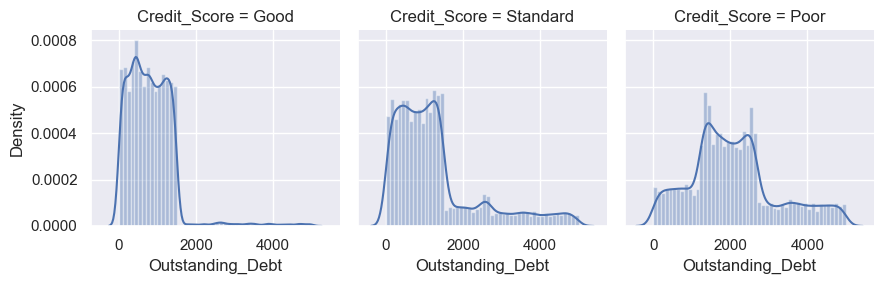

In [33]:
### Outstanding Debt distribution by Credit Score

grid = sns.FacetGrid(df, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

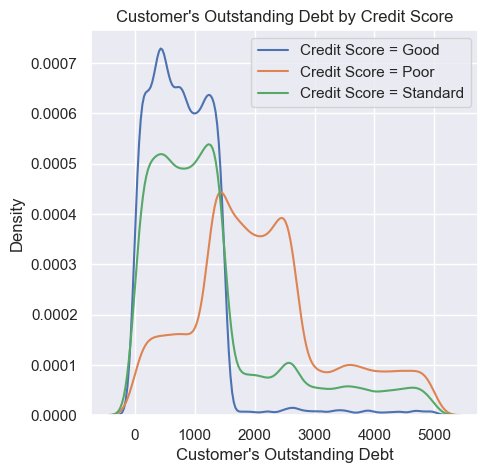

In [34]:
### Merging the above graphs into one

sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(df['Outstanding_Debt'][df['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

### 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values
3. Feature engineering
4. Data trasformation
5. Feature encoding

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [20]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(df.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(df, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 421 indices:  [1293, 2902, 3189, 3690, 7036, 7882, 8558, 8660, 9736, 9879, 10840, 12673, 13036, 13486, 15026, 17379, 17827, 18004, 18349, 20250, 20537, 20538, 22612, 24240, 24736, 25123, 25603, 25878, 25923, 27836, 27875, 28278, 30249, 31288, 31399, 31985, 33553, 34160, 34565, 34582, 35783, 36015, 36053, 36855, 36985, 37534, 39169, 39393, 41749, 43050, 44633, 44634, 45410, 46737, 47961, 48455, 48536, 48794, 50233, 51828, 53352, 54009, 54030, 56161, 56166, 58772, 59049, 60088, 60659, 61146, 61938, 62054, 63816, 64165, 65928, 68449, 68810, 69041, 73756, 76155, 77767, 78865, 78900, 81038, 81041, 82992, 83102, 84577, 85316

Now let's look at the data present in the rows.

In [21]:
df.iloc[outliers_to_drop, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,...,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,NaN,269.053164,Good
2902,0x2700,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,...,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
3189,0x28af,CUS_0x3fa8,June,Kumarp,471.0,283-56-6375,Writer,177243.920,14526.326667,4,...,Good,488.95,37.041853,28 Years and 9 Months,NM,284.804197,485.387942,NaN,942.440528,Standard
3690,0x2ba0,CUS_0x29b2,March,Martinnet,1170.0,626-80-0791,Media_Manager,59930.040,5207.170000,7,...,Bad,4474.29,32.303684,1 Years and 11 Months,Yes,156.596164,165.383895,High_spent_Medium_value_payments,448.736941,Standard
7036,0x3f3a,CUS_0x3949,May,Scotto,6520.0,908-89-0498,Musician,63353.680,5356.473333,9,...,Bad,4362.52,31.463332,1 Years and 2 Months,NM,390.451288,233.035327,Low_spent_Large_value_payments,182.160718,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78919,0x1e469,CUS_0x1250,August,Denny Thomasx,28.0,NaN,Developer,72503.560,5974.963333,6,...,Bad,4205.60,35.858495,13 Years and 8 Months,Yes,362.846101,107.356485,High_spent_Medium_value_payments,377.293747,Standard
79910,0x1ea38,CUS_0x9bf9,July,Robini,37.0,258-44-7121,Architect,78953.920,6384.858899,10,...,Bad,4437.80,25.322236,12 Years and 7 Months,Yes,550.483410,674.712402,Low_spent_Medium_value_payments,NaN,Good
81375,0x1f2cd,CUS_0xa5d1,August,Deepay,38.0,734-18-4220,Media_Manager,20269.930,1617.160833,7,...,Bad,4459.50,32.331961,3 Years and 5 Months,Yes,45049.000000,78.484910,High_spent_Small_value_payments,251.362617,Standard
86554,0x21128,CUS_0x442f,March,Herberts,27.0,438-91-3759,NaN,16702.250,1640.854167,10,...,NaN,4536.64,34.027250,NaN,Yes,27223.000000,77.727913,Low_spent_Medium_value_payments,308.886570,Poor


We will drop these rows from the dataset.

In [22]:
### Drop outliers and reset index

print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))

Before: 100000 rows
After: 99579 rows


In [23]:
### Lets look at the new dataset

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9947
Age                             0
SSN                          5553
Occupation                   7032
Annual_Income                   0
Monthly_Inhand_Salary       14940
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11392
Delay_from_due_date             0
Num_of_Delayed_Payment       6973
Changed_Credit_Limit         2082
Num_Credit_Inquiries         1953
Credit_Mix                  20120
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8989
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4454
Payment_Behaviour            7569
Monthly_Balance              2839
Credit_Score                    0
dtype: int64

#### 4.2 Drop and fill missing values

Here, we will drop the columns - ID, Customer_ID, Name, SSN, Num_of_Loan from the dataset.

In [24]:
df.drop('Num_of_Loan',axis=1,inplace=True)  
#Type_of_Loan and Num_of_Loan are reduntant columns, so we decide to drop Num_of_Loan column

In [25]:
### Dropping the columns from the dataset

df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis = 1, inplace = True)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99574,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",23,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99575,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",18,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99576,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99577,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [26]:
### Looking at the missing values in the dataset

df.isnull().sum().sort_values(ascending = False)

Credit_Mix                  20120
Monthly_Inhand_Salary       14940
Type_of_Loan                11392
Credit_History_Age           8989
Payment_Behaviour            7569
Occupation                   7032
Num_of_Delayed_Payment       6973
Amount_invested_monthly      4454
Monthly_Balance              2839
Changed_Credit_Limit         2082
Num_Credit_Inquiries         1953
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Month                           0
Outstanding_Debt                0
Age                             0
Delay_from_due_date             0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Credit_Score                    0
dtype: int64

From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries. Here, we will focus on removing the missing values in the columns - Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, and Num_Credit_Inquiries. However, we will replace the missing values in the column - Type_of_Loan in the Feature Engineering section.

##### 4.2.1 Handling missing values - Monthly_Inhand_Salary

Here, for replacing the missing values in the column - Monthly_Inhand_Salary, we will use the column Credit_Score and find the mean of the salary based on the Credit Score.

In [27]:
### Finding the mean value of the column - Monthly_Inhand_Salary in the dataset using Credit_Score

salary_good_mean = np.mean(df[df['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(df[df['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(df[df['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])

(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5379.96572347794, 3371.634959431273, 4237.927164601389)

In [28]:
### Finding the indices of the rows where Monthly_Inhand_Salary is null

index_values = list(df['Monthly_Inhand_Salary'].isnull())
index_values

[False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 T

In [29]:
### Replacing the missing values in the column Monthly_Inhand_Salary using the decision logic

for index in range(len(df)):
    if index_values[index]:
        if df['Credit_Score'][index] == 'Good':
            df['Monthly_Inhand_Salary'][index] = salary_good_mean
        elif df['Credit_Score'][index] == 'Poor':
            df['Monthly_Inhand_Salary'][index] = salary_poor_mean
        else:
            df['Monthly_Inhand_Salary'][index] = salary_standard_mean

In [30]:
# Replacing invalid salary values with null
lst=[abs(int(i)) for i in df['Monthly_Inhand_Salary'].tolist()]
sal = [i if i>0 else np.nan for i in lst]
df['Monthly_Inhand_Salary'] = sal
df['Monthly_Inhand_Salary'].replace(np.nan,0,inplace=True)

In [31]:
### Checking if there are any missing values of Monthly_Inhand_Salary in the dataset

df['Monthly_Inhand_Salary'].isnull().sum()

0

We replaced all the missing values present in the column - Monthly_Inhand_Salary.

##### 4.2.2 Handling missing values - Num_of_Delayed_Payment

Here, we will use the median to replace the missing values in the column - Num_of_Delayed_Payment.

In [32]:
### Finding the median value of the column - Num_of_Delayed_Payment in the dataset

payment_index = list(~df['Num_of_Delayed_Payment'].isnull())
median_payment = np.median(df['Num_of_Delayed_Payment'].loc[payment_index])
median_payment

14.0

In [33]:
### Replacing the missing values of the column - Num_of_Delayed_Payment in the dataset

df['Num_of_Delayed_Payment'].fillna(median_payment, inplace = True)

In [34]:
### Checking if there are any missing values of Num_of_Delayed_Payment in the dataset

df['Num_of_Delayed_Payment'].isnull().sum()

0

We replaced all the missing values present in the column - Num_of_Delayed_Payment.

##### 4.2.3 Handling missing values - Amount_invested_monthly

Here, we will use the median to replace the missing values in the column - Amount_invested_monthly.

In [35]:
### Finding the median value of the column - Amount_invested_monthly in the dataset

amount_index = list(~df['Amount_invested_monthly'].isnull())
median_amount = np.median(df['Amount_invested_monthly'].loc[amount_index])
median_amount

135.90707712614073

In [36]:
### Replacing the missing values of the column - Amount_invested_monthly in the dataset

df['Amount_invested_monthly'].fillna(median_amount, inplace = True)

In [37]:
### Checking if there are any missing values of Amount_invested_monthly in the dataset

df['Amount_invested_monthly'].isnull().sum()

0

We replaced all the missing values present in the column - Amount_invested_monthly.

##### 4.2.4 Handling missing values - Num_Credit_Inquiries

Here, we will use the median to replace the missing values in the column - Num_Credit_Inquiries.

In [38]:
### Finding the median value of the column - Num_Credit_Inquiries in the dataset

inquiries_index = list(~df['Num_Credit_Inquiries'].isnull())
median_inquiries = np.median(df['Num_Credit_Inquiries'].loc[inquiries_index])
median_inquiries

6.0

In [39]:
### Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

df['Num_Credit_Inquiries'].fillna(median_inquiries, inplace = True)

In [40]:
### Checking if there are any missing values of Num_Credit_Inquiries in the dataset

df['Num_Credit_Inquiries'].isnull().sum()

0

We replaced all the missing values present in the column - Num_Credit_Inquiries.

##### 4.2.5 Handling missing values - Credit_Mix

Here, for replacing the missing values in the column - Credit_Mix, we will use the column Credit_Score and find the mode of the Credit_Mix based on the Credit Score.

In [41]:
good_mode = (df[df['Credit_Score'] == 'Good']['Credit_Mix']).mode()
poor_mode = (df[df['Credit_Score'] == 'Poor']['Credit_Mix']).mode()
standard_mode = (df[df['Credit_Score'] == 'Standard']['Credit_Mix']).mode()

good_mode, poor_mode, standard_mode

(0    Good
 Name: Credit_Mix, dtype: object,
 0    Bad
 Name: Credit_Mix, dtype: object,
 0    Standard
 Name: Credit_Mix, dtype: object)

In [42]:
### Finding the indices of the rows where Credit_Mix is null

index_values = list(df['Credit_Mix'].isnull())

In [43]:
### Replacing the missing values in the column Credit_Mix using the decision logic

for index in range(len(df)):
    if index_values[index]:
        if df['Credit_Score'][index] == 'Good':
            df['Credit_Mix'][index] = 'Good'
        elif df['Credit_Score'][index] == 'Poor':
            df['Credit_Mix'][index] = 'Bad'
        else:
            df['Credit_Mix'][index] = 'Standard'

In [44]:
### Checking if there are any missing values of Credit_Mix in the dataset

df['Credit_Mix'].isnull().sum()

0

We replaced all the missing values present in the column - Num_Credit_Inquiries.

##### 4.2.6 Handling missing values - Monthly_Balance

Here, we will use the median to replace the missing values in the column - Monthly_Balance.

In [45]:
bal_index = list(~df['Monthly_Balance'].isnull())
median_bal = np.median(df['Monthly_Balance'].loc[bal_index])
median_bal

336.6131768441686

In [46]:
### Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

df['Monthly_Balance'].fillna(median_bal, inplace = True)

In [47]:
### Checking if there are any missing values of Num_Credit_Inquiries in the dataset

df['Monthly_Balance'].isnull().sum()

0

We replaced all the missing values present in the column - Monthly_Balance.

##### 4.2.7 Handling other missing values 

In [48]:
cols = ['Credit_History_Age','Payment_Behaviour','Occupation','Changed_Credit_Limit']

In [49]:
for i in cols:
    df[i].fillna(method='bfill',inplace=True)

In [50]:
# Replacing invalid age values with null
age_list=[abs(int(i)) for i in df.Age.tolist()]
age = [i if i<=95 else np.NaN for i in age_list]
df['Age'] = age

#Replacing missing values using backwardfill
df['Age'].fillna(method='bfill',inplace=True)

In [53]:
df.dropna(subset=['Payment_Behaviour'],inplace=True)

In [54]:
### Looking if the dataset has any more missing values apart from Type_of_Loan

df.isnull().sum().sort_values(ascending = False)

Type_of_Loan                11392
Month                           0
Num_Credit_Inquiries            0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Changed_Credit_Limit            0
Age                             0
Num_of_Delayed_Payment          0
Delay_from_due_date             0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Monthly_Inhand_Salary           0
Annual_Income                   0
Occupation                      0
Credit_Score                    0
dtype: int64

Since, there are no missing values in the data apart from the data in the column - Type_of_Loan (which we will deal in the Feature Engineering), we can proceed to perform Feature Engineering.

#### 4.3 Statistical Analysis

In [70]:
#For Categorical features
df_cat = df.select_dtypes(include=object)

#### Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Here we can check if the catagorical features are dependent on our target.<br>
We are assuming the level of confidence as 95%

In [55]:
# taking only the features from catagories
df_catfeat = df_cat.drop('Credit_Score',axis=1)
df_target = df_cat['Credit_Score']

NameError: name 'df_cat' is not defined

In [72]:
for i in df_catfeat.columns:
    
    print('Feature: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: {} and loan_status are independent'.format(i))
    print('H1: {} and loan_status are not independent'.format(i))
    print('')
    
    table=pd.crosstab(df_catfeat[i],df_target)
    observed_value=table.values
    
    # use the 'chi2_contingency()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
    # pass the observed values to the parameter, 'observed'
    # 'correction = False' will not apply the Yates' correction
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

    print("Test statistic:", test_stat)
    print("p-value:", p)
    
    if p > 0.05:
        print('{} and Credit score are independent'.format(i))
    else:
        print('{} and Credit score are not independent'.format(i))  
    
    print('-'*50)
    print()

Feature:  Month
The null and alternative hypothesis is:
 
H0: Month and loan_status are independent
H1: Month and loan_status are not independent

Test statistic: 201.12691816459608
p-value: 3.2328476971164285e-35
Month and Credit score are not independent
--------------------------------------------------

Feature:  Occupation
The null and alternative hypothesis is:
 
H0: Occupation and loan_status are independent
H1: Occupation and loan_status are not independent

Test statistic: 176.96763272899636
p-value: 1.428782032674617e-23
Occupation and Credit score are not independent
--------------------------------------------------

Feature:  Type_of_Loan
The null and alternative hypothesis is:
 
H0: Type_of_Loan and loan_status are independent
H1: Type_of_Loan and loan_status are not independent

Test statistic: 64902.3581741082
p-value: 0.0
Type_of_Loan and Credit score are not independent
--------------------------------------------------

Feature:  Credit_Mix
The null and alternative h

In [57]:
#For Numerical Features
df_num = df.select_dtypes(exclude=object)

In [58]:
# importing jarque_bera function from the scipy.stats library
from scipy.stats import shapiro

The null and alternative hypothesis for shapiro test is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data is normally distributed. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data is not normally distributed. </strong></p>

Assuming the level of confidence as 95%

In [59]:
for i in df_num.columns:
    print('Feature: ',i)
    
    print(shapiro(df[i]),'\n')

Feature:  Age
ShapiroResult(statistic=0.9735263586044312, pvalue=0.0) 

Feature:  Annual_Income
ShapiroResult(statistic=0.07223278284072876, pvalue=0.0) 

Feature:  Monthly_Inhand_Salary
ShapiroResult(statistic=0.8955439329147339, pvalue=0.0) 

Feature:  Num_Bank_Accounts
ShapiroResult(statistic=0.08486765623092651, pvalue=0.0) 

Feature:  Num_Credit_Card
ShapiroResult(statistic=0.11902940273284912, pvalue=0.0) 

Feature:  Interest_Rate
ShapiroResult(statistic=0.11247783899307251, pvalue=0.0) 

Feature:  Delay_from_due_date
ShapiroResult(statistic=0.9207563400268555, pvalue=0.0) 

Feature:  Num_of_Delayed_Payment
ShapiroResult(statistic=0.06051844358444214, pvalue=0.0) 

Feature:  Changed_Credit_Limit
ShapiroResult(statistic=0.968600869178772, pvalue=0.0) 

Feature:  Num_Credit_Inquiries
ShapiroResult(statistic=0.1007007360458374, pvalue=0.0) 

Feature:  Outstanding_Debt
ShapiroResult(statistic=0.8844411969184875, pvalue=0.0) 

Feature:  Credit_Utilization_Ratio
ShapiroResult(statistic

Pvalue is less that 0.05(alpha), therefore numerical features are not normally distributed.
Therefore we can opt for `kruskal wallis test` to check the dependence of features on the target variable.

The null and alternative hypothesis for `kruskal wallis test` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal median (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal median(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [60]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [61]:
for i in df_num.columns:
    
    print('feature: ',i)
    
    print('The null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    
    poor = df[df['Credit_Score'] == 'Poor'][i]
    standard = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(poor,standard,good)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('{} and Credit score are independent'.format(i))
    else:
        print('{} and Credit score are not independent'.format(i)) 
    print('-'*50)
    print()

feature:  Age
The null and alternative hypothesis is:
 
H0: The variables Age and loan_status are independent
H1: The variables Age and loan_status are not independent

Test statistic: 2267.5628791311697
p-value: 0.0
Age and Credit score are not independent
--------------------------------------------------

feature:  Annual_Income
The null and alternative hypothesis is:
 
H0: The variables Annual_Income and loan_status are independent
H1: The variables Annual_Income and loan_status are not independent

Test statistic: 4178.492691230507
p-value: 0.0
Annual_Income and Credit score are not independent
--------------------------------------------------

feature:  Monthly_Inhand_Salary
The null and alternative hypothesis is:
 
H0: The variables Monthly_Inhand_Salary and loan_status are independent
H1: The variables Monthly_Inhand_Salary and loan_status are not independent

Test statistic: 4914.296145870779
p-value: 0.0
Monthly_Inhand_Salary and Credit score are not independent
------------

In [62]:
print('The dependent numerical variable found after K-test Test:')
print('')
for i in df_num.columns:
    poor = df[df['Credit_Score'] == 'Poor'][i]
    standard = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]
    
    test_stat, p = kruskal(poor,standard,good)

    if p < 0.05:
        print(i)

The dependent numerical variable found after K-test Test:

Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance


In [63]:
print('The independent numerical variable found after K-test Test:')
print('')
for i in df_num.columns:
    poor = df[df['Credit_Score'] == 'Poor'][i]
    standard = df[df['Credit_Score'] == 'Standard'][i]
    good = df[df['Credit_Score'] == 'Good'][i]
    
    test_stat, p = kruskal(poor,standard,good)

    if p > 0.05:
        print(i)

The independent numerical variable found after K-test Test:



#### 4.4 Feature Engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

Here, we focus on creating new columns for:

1. Individual columns for Type_of_Loan

##### 4.3.1 Individual columns for Type_of_Loan

Here, we will create 8 different columns using the loan_type_dict dictionary. Here, we will not consider the value Not Specified for the loan type.

In [64]:
### Looking at the loan_type_dict

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [65]:
### Creating 8 different lists for each loan type

auto_loan = [0] * (len(df))
credit_builder_loan = [0] * (len(df))
personal_loan = [0] * (len(df))
home_equity_loan = [0] * (len(df))
mortgage_loan = [0] * (len(df))
student_loan = [0] * (len(df))
debt_consolidation_loan = [0] * (len(df))
payday_loan = [0] * (len(df))

In [66]:
### Using 0's and 1's if a customer has a particular loan

for index in range(len(loan_type_data)):
    ### For Auto Loan
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    ### For Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    ### For Personal Loan
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    ### For Home Equity Loan
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    ### For Mortgage Loan
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    ### For Student Loan
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    ### For Debt Consolidation loan
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    ### For Payday loan
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [67]:
### Adding the new columns to the dataset

df['Auto_Loan'] = auto_loan
df['Credit_Builder_Loan'] = credit_builder_loan
df['Personal_Loan'] = personal_loan
df['Home_Enquity_Loan'] = home_equity_loan
df['Mortgage_Loan'] = mortgage_loan
df['Student_Loan'] = student_loan
df['Debt_Consolidation_Loan'] = debt_consolidation_loan
df['Payday_Loan'] = payday_loan

In [68]:
### Removing the column - Type_of_loan

df.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [69]:
### Looking at the modified dataset

df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,January,23.0,Scientist,19114.12,1824,3,4,3,3,7.0,...,312.494089,Good,1,1,1,1,0,0,0,0
1,February,23.0,Scientist,19114.12,5379,3,4,3,-1,14.0,...,284.629162,Good,1,1,1,1,0,0,0,0
2,March,23.0,Scientist,19114.12,5379,3,4,3,3,7.0,...,331.209863,Good,1,1,1,1,0,0,0,0
3,April,23.0,Scientist,19114.12,5379,3,4,3,5,4.0,...,223.451310,Good,1,1,1,1,0,0,0,0
4,May,23.0,Scientist,19114.12,1824,3,4,3,6,14.0,...,341.489231,Good,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99573,March,25.0,Mechanic,39628.99,3359,4,6,7,20,6.0,...,336.613177,Poor,0,0,0,0,0,0,0,0
99574,April,25.0,Mechanic,39628.99,3359,4,6,7,23,7.0,...,336.613177,Poor,0,0,0,0,0,0,0,0
99575,May,25.0,Mechanic,39628.99,3359,4,6,7,18,7.0,...,336.613177,Poor,0,0,0,0,0,0,0,0
99576,June,25.0,Mechanic,39628.99,3359,4,6,5729,27,6.0,...,336.613177,Poor,0,0,0,0,0,0,0,0


#### 4.4 Data Transformation 

In [70]:
df.skew()

Age                           0.161241
Annual_Income                12.738555
Monthly_Inhand_Salary         1.205695
Num_Bank_Accounts            11.361095
Num_Credit_Card               8.639570
Interest_Rate                 9.137217
Delay_from_due_date           0.967119
Num_of_Delayed_Payment       14.864098
Changed_Credit_Limit          0.640188
Num_Credit_Inquiries          9.890286
Outstanding_Debt              1.210516
Credit_Utilization_Ratio      0.027894
Total_EMI_per_month           7.203119
Amount_invested_monthly       4.436194
Monthly_Balance            -105.173930
Auto_Loan                     0.837405
Credit_Builder_Loan           0.778542
Personal_Loan                 0.809764
Home_Enquity_Loan             0.794891
Mortgage_Loan                 0.796894
Student_Loan                  0.812995
Debt_Consolidation_Loan       0.812995
Payday_Loan                   0.767849
dtype: float64

From the dataset, we can see that there is a lot of skewness in the numerical columns of the dataset. Here, we will focus on removing the skewness in the data using log transformation.

##### 4.4.1  Log Transforming the column - Monthly_Inhand_Salary

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

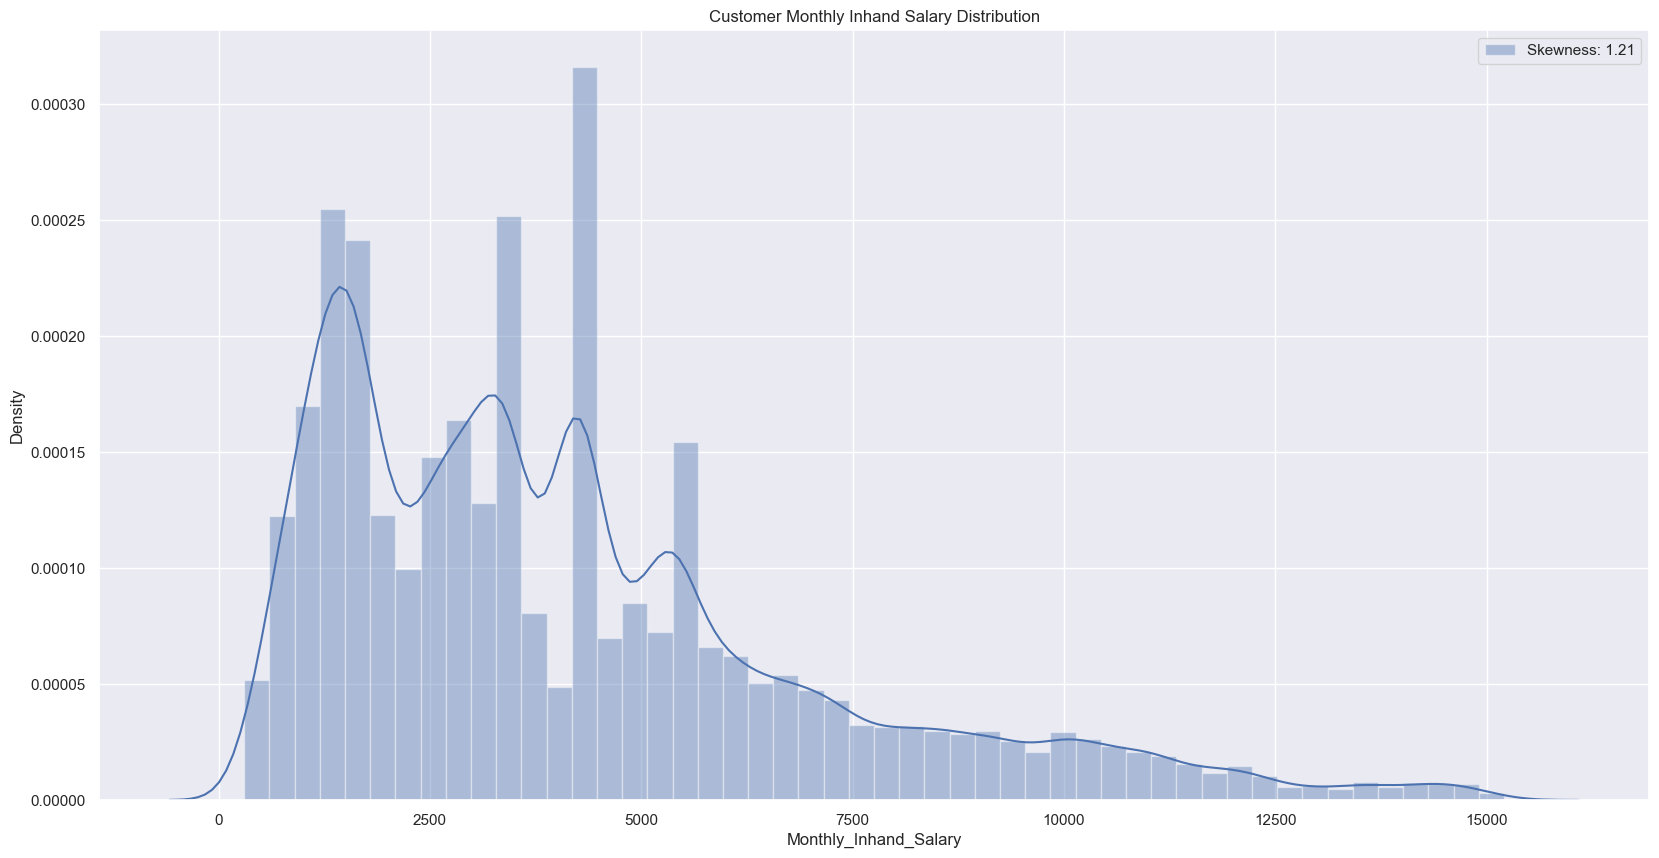

In [71]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

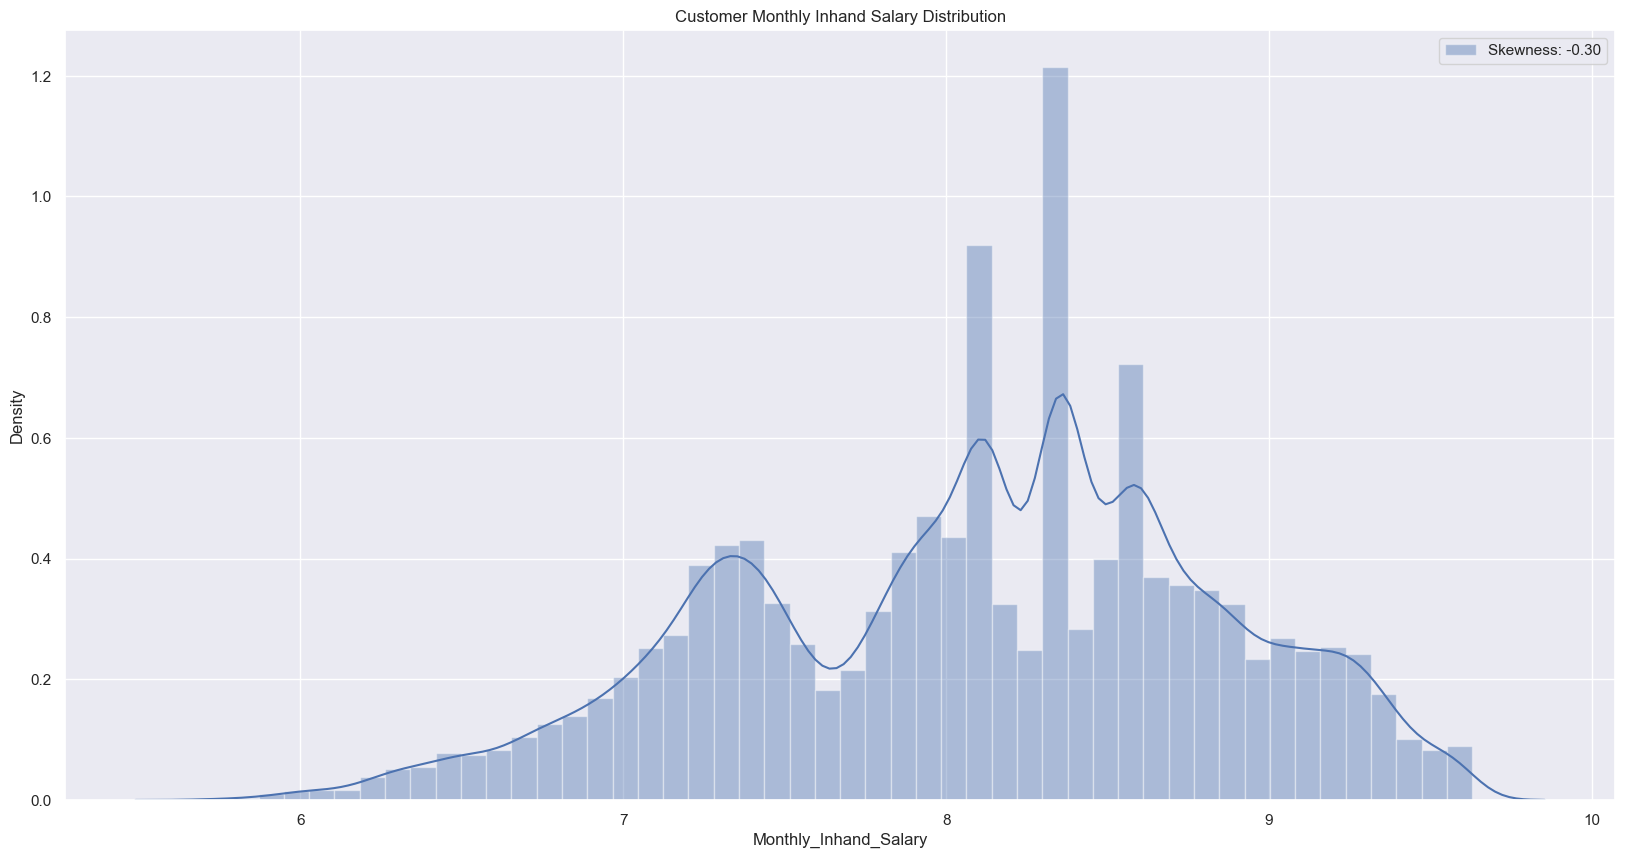

In [72]:
### Understanding the distribution of the data log(Monthly_Inhand_Salary)

modified_salary = [np.log(salary) for salary in df['Monthly_Inhand_Salary']]
df['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.2 Log Transforming the column - Interest_Rate

Text(0.5, 1.0, 'Interest Rate Distribution')

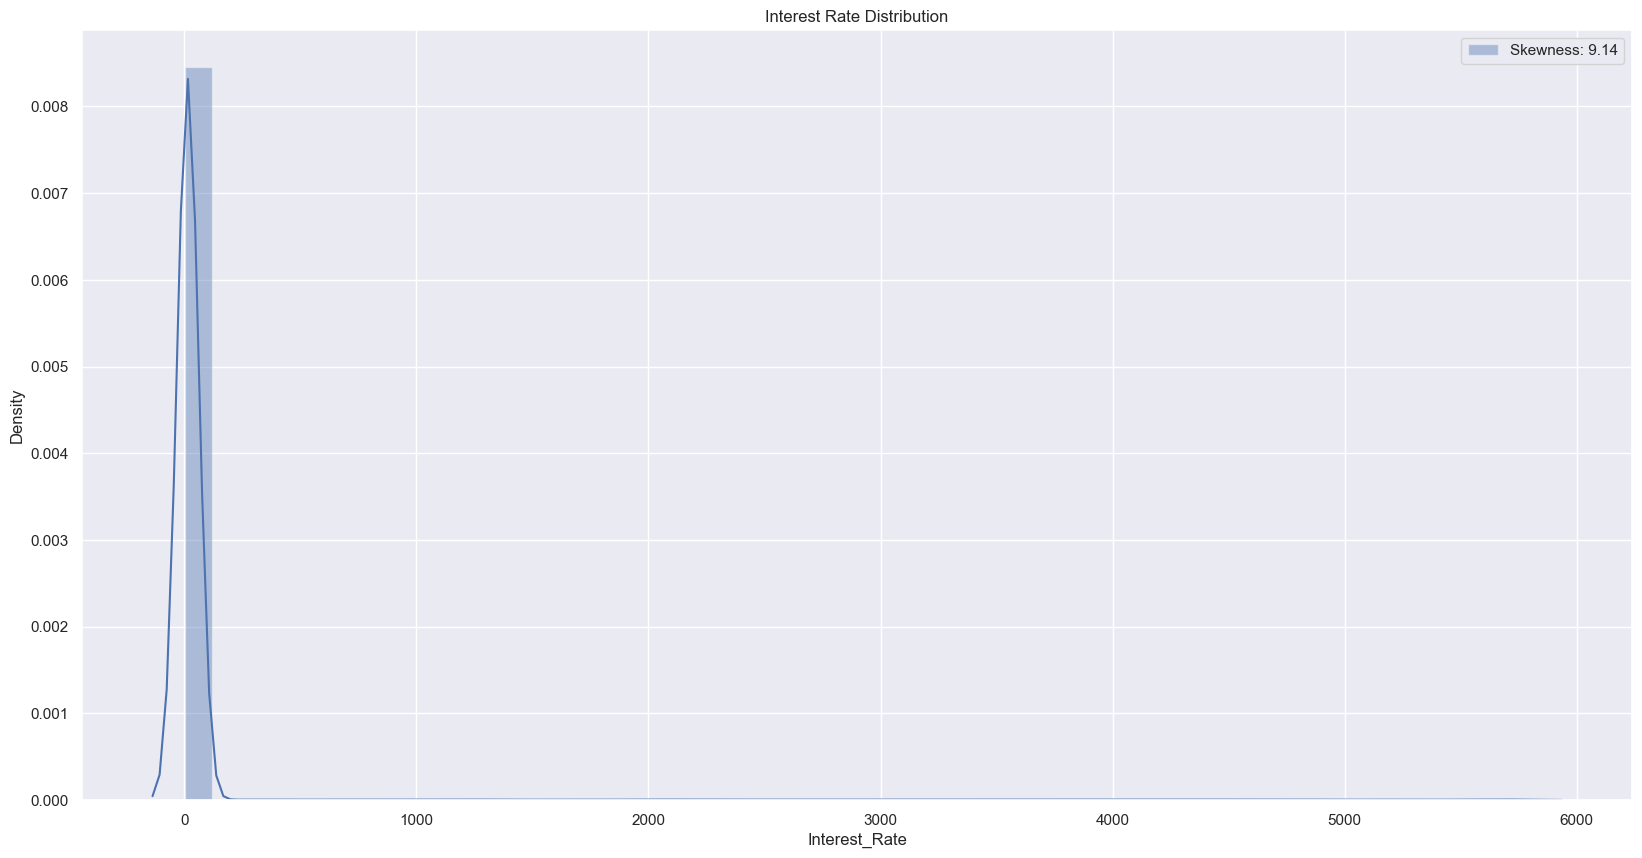

In [73]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

Text(0.5, 1.0, 'Interest Rate Distribution')

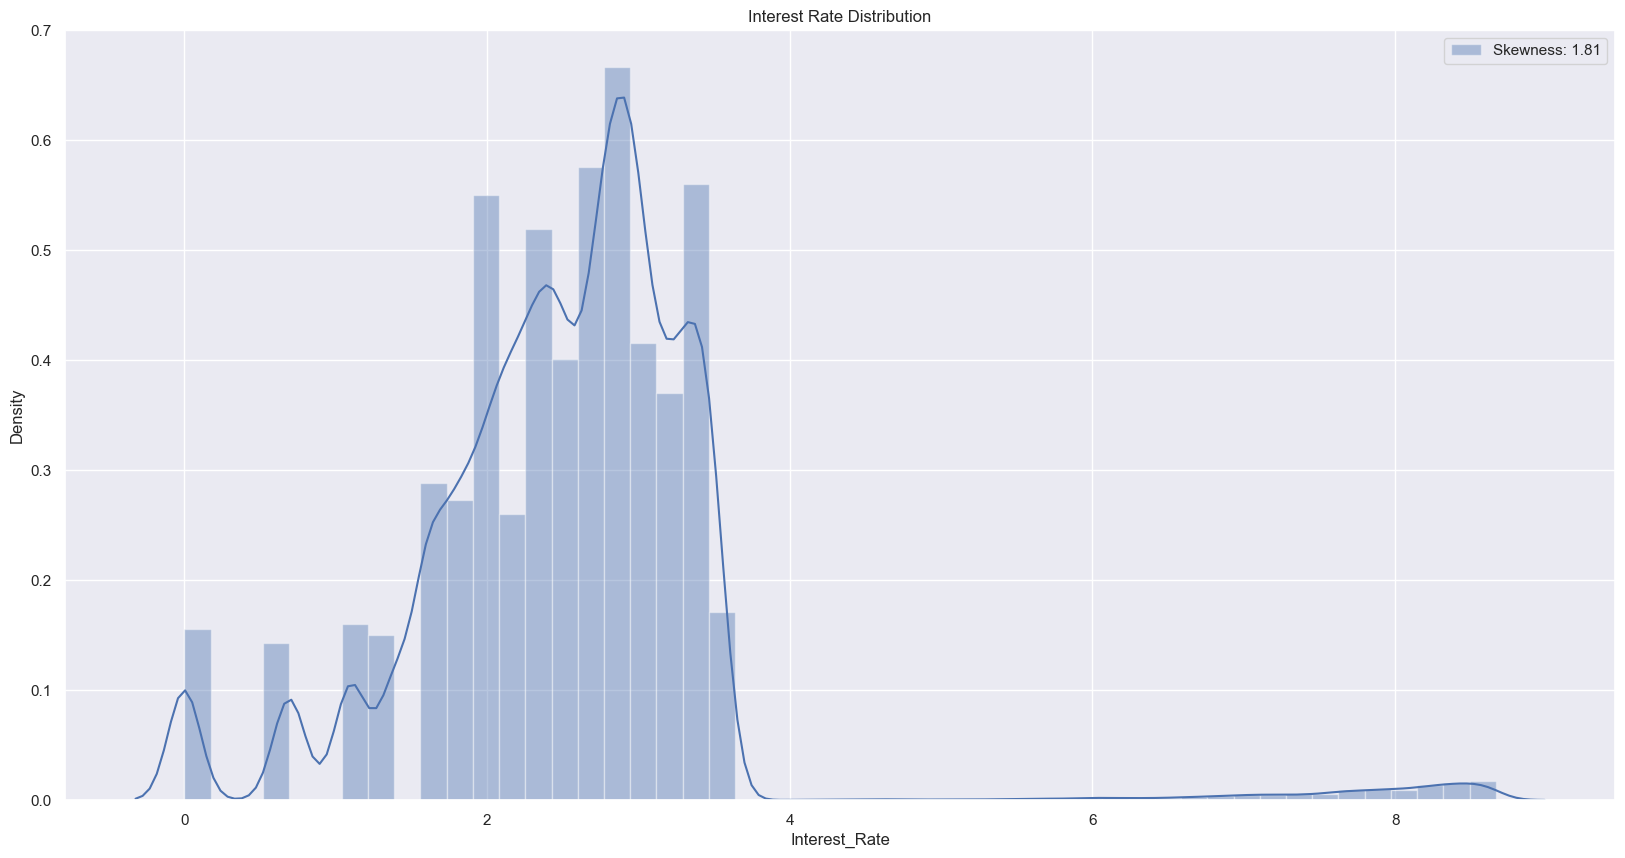

In [74]:
### Understanding the distribution of the data log(Interest_Rate)

modified_interest = [np.log(interest) if interest > 0 else 0 for interest in df['Interest_Rate']]
df['Interest_Rate'] = modified_interest

sns.distplot(df['Interest_Rate'], label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.3 Log Transforming the column - Num_of_Delayed_Payment

Text(0.5, 1.0, 'Delayed Payment Distribution')

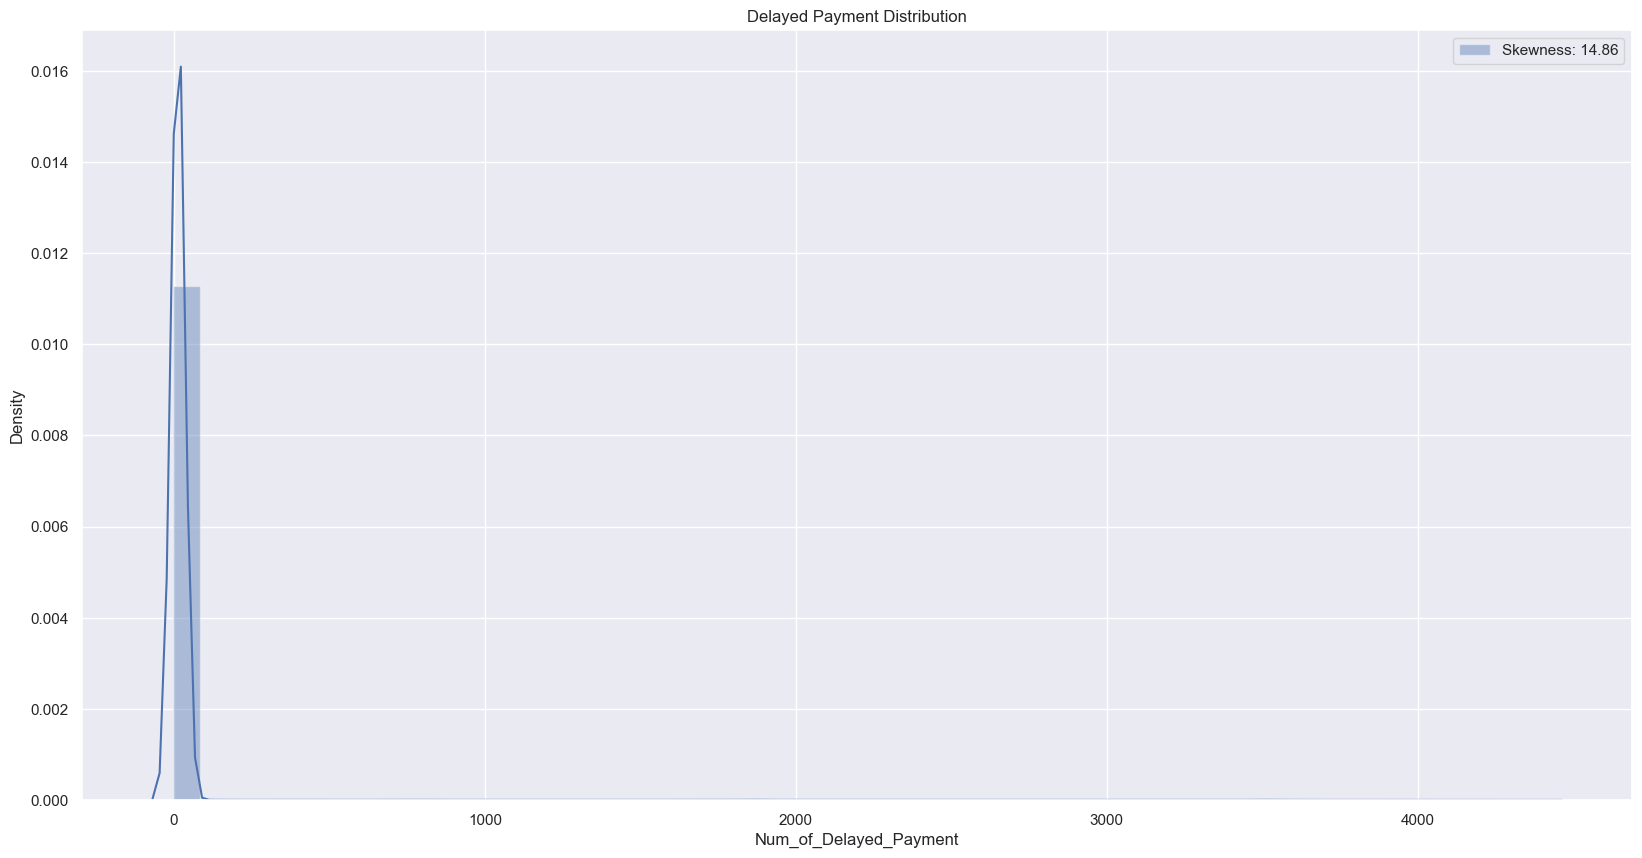

In [75]:
### Understanding the distribution of the column - Num_of_Delayed_Payment

sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

Text(0.5, 1.0, 'Delayed Payment Distribution')

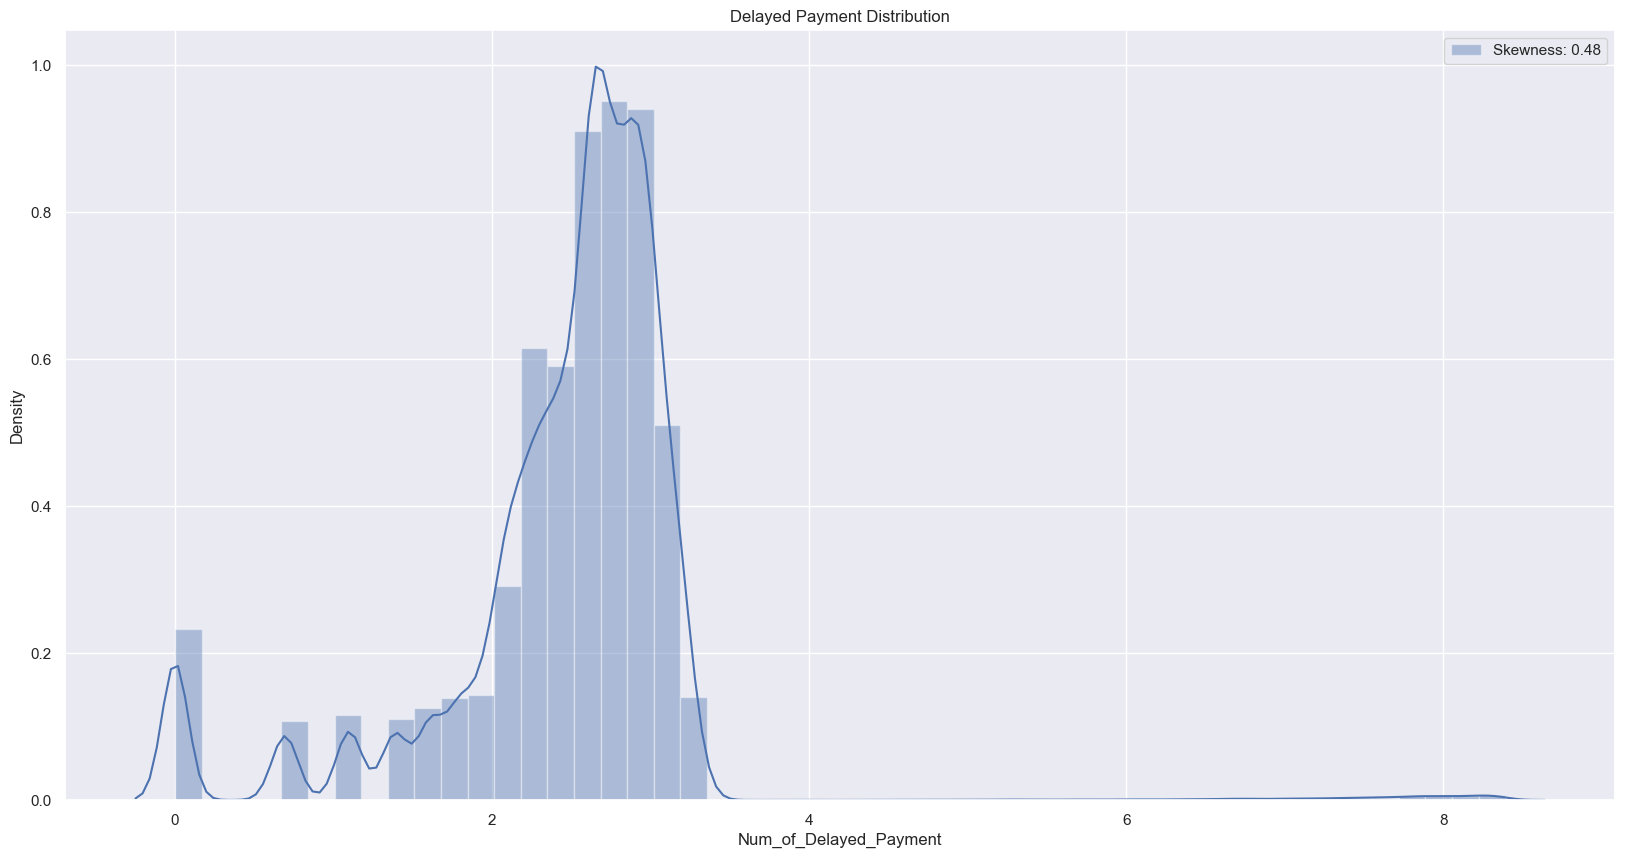

In [76]:
### Understanding the distribution of the data log(Num_of_Delayed_Payment)

modified_payment = [np.log(payment) if payment > 0 else 0 for payment in df['Num_of_Delayed_Payment']]
df['Num_of_Delayed_Payment'] = modified_payment

sns.distplot(df['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(df['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.4 Log Transforming the column - Num_Credit_Inquiries

Text(0.5, 1.0, 'Number of Credit Inquiries')

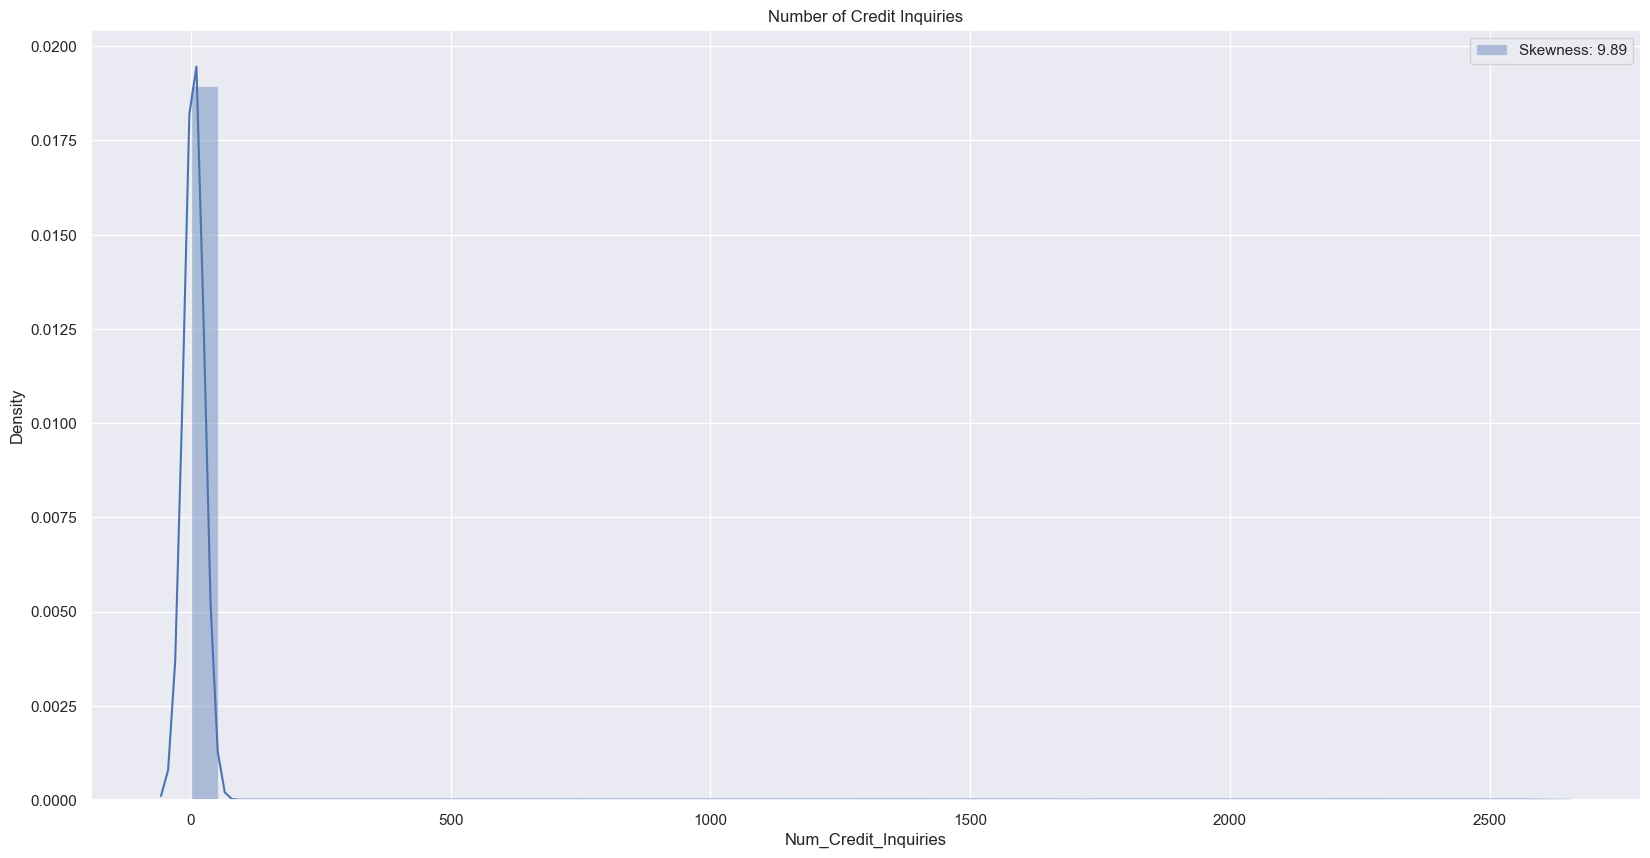

In [77]:
### Understanding the distribution of the column - Num_Credit_Inquiries

sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')

Text(0.5, 1.0, 'Number of Credit Card Inquiries')

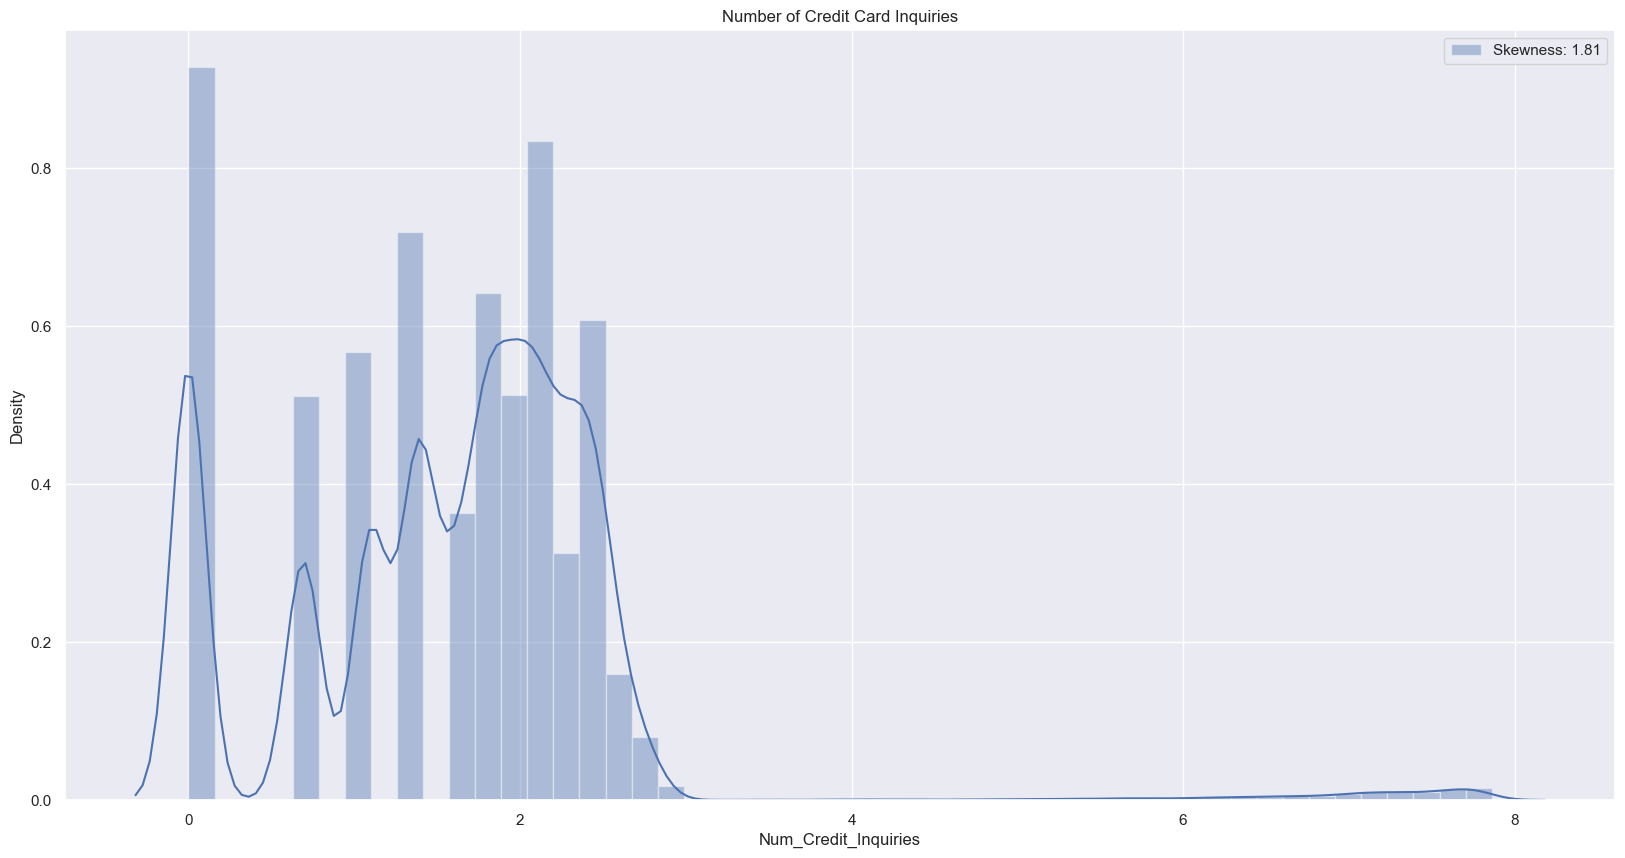

In [78]:
### Understanding the distribution of the data log(Num_Credit_Inquiries)

modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in df['Num_Credit_Inquiries']]
df['Num_Credit_Inquiries'] = modified_inquiries

sns.distplot(df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(df['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Card Inquiries')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.5 Log Transforming the column - Total_EMI_per_month

Text(0.5, 1.0, 'Total EMI per month Distribution')

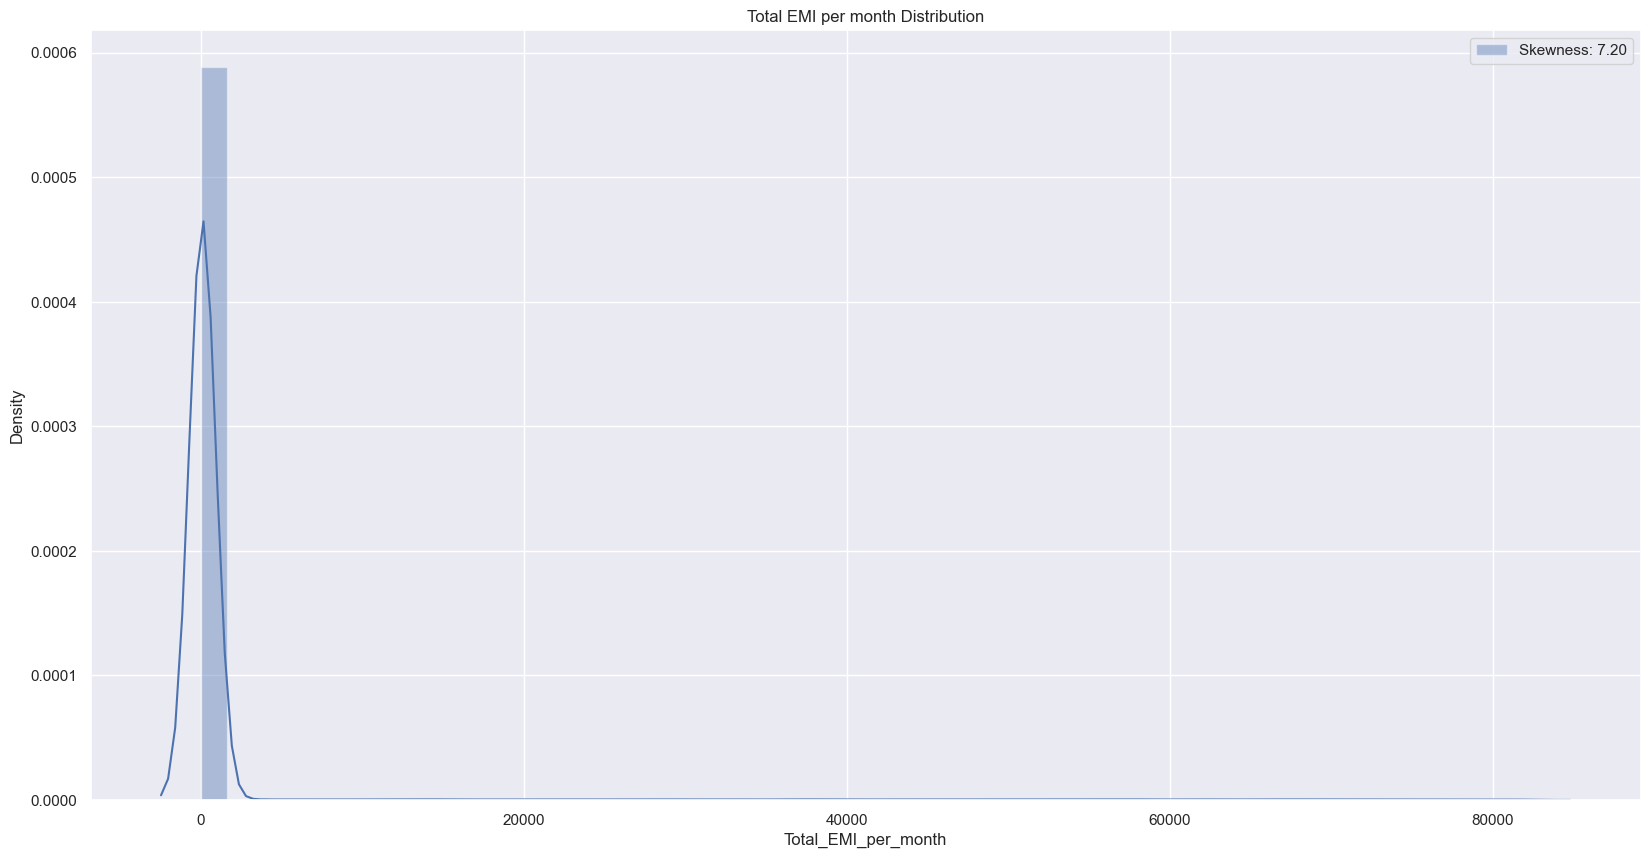

In [79]:
### Understanding the distribution of the column - Total_EMI_per_month

sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

Text(0.5, 1.0, 'Total EMI per month Distribution')

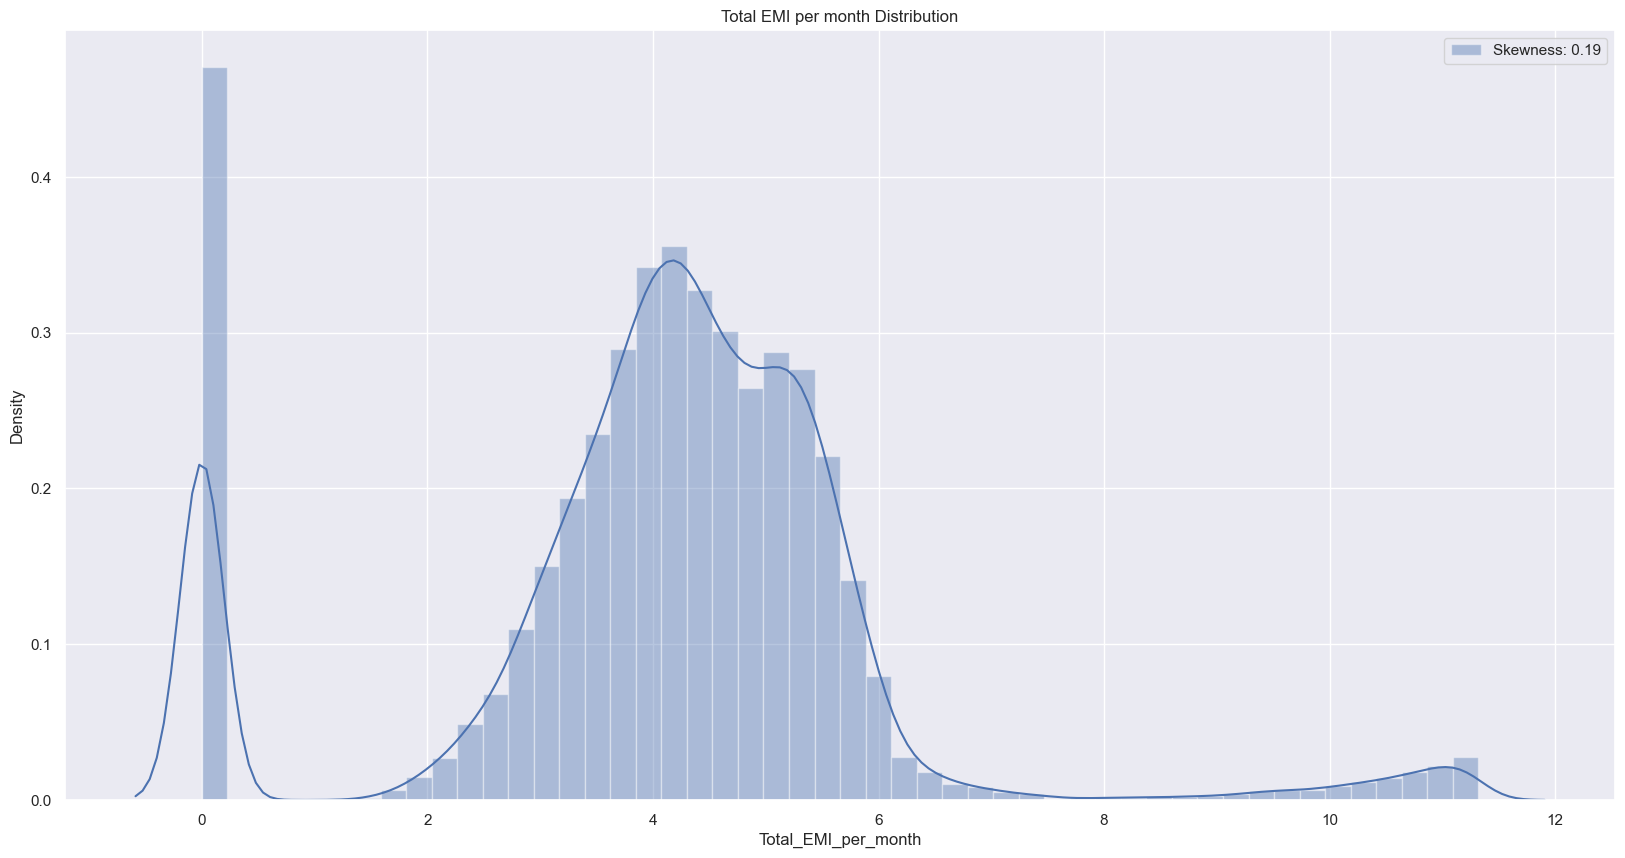

In [80]:
### Understanding the distribution of the data log(Total_EMI_per_month)

modified_emi = [np.log(emi) if emi > 0 else 0 for emi in df['Total_EMI_per_month']]
df['Total_EMI_per_month'] = modified_emi

sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.6 Log Transforming the column - Amount_invested_monthly

Text(0.5, 1.0, 'Amount invested monthly Distribution')

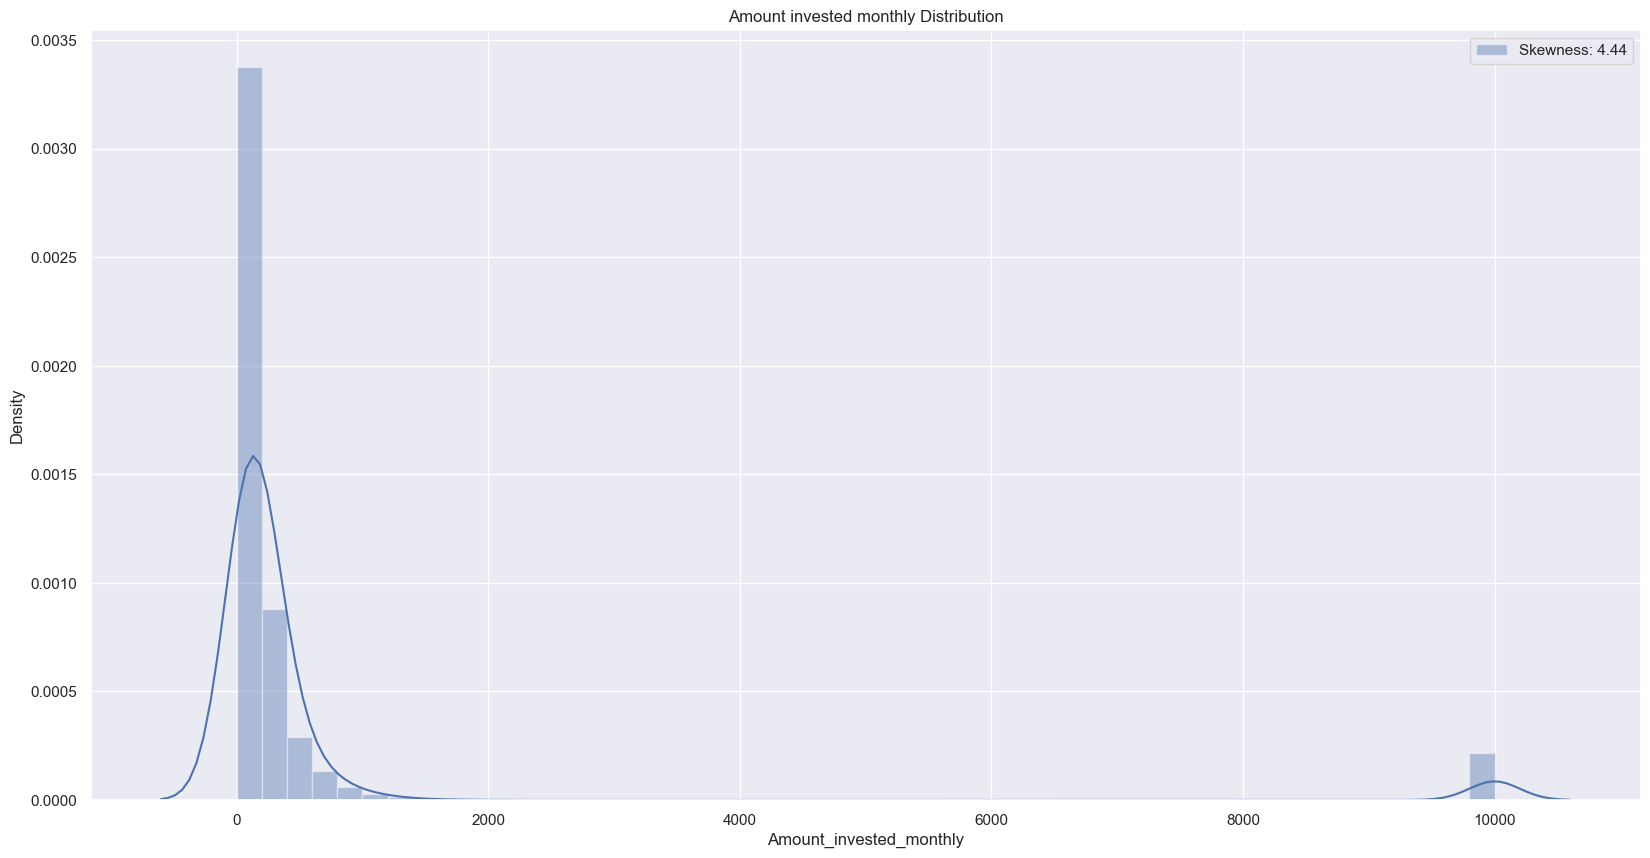

In [81]:
### Understanding the distribution of the column - Amount_invested_monthly

sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

Text(0.5, 1.0, 'Amount invested monthly Distribution')

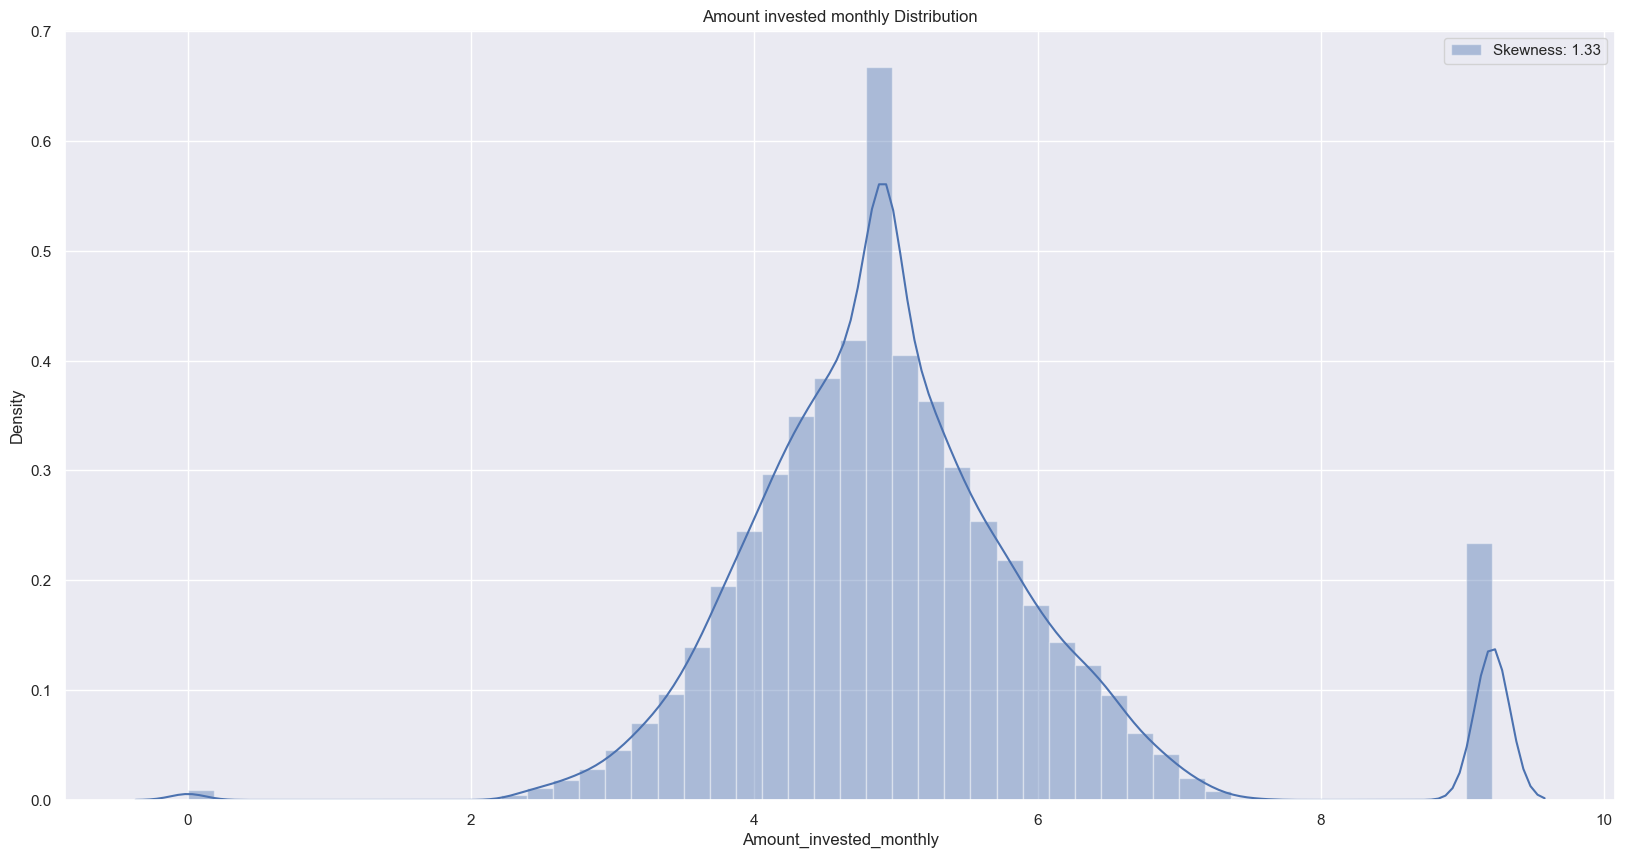

In [82]:
### Understanding the distribution of the data log(Amount_invested_monthly)

modified_amount = [np.log(amount) if amount > 0 else 0 for amount in df['Amount_invested_monthly']]
df['Amount_invested_monthly'] = modified_amount

sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.7 Log Transforming the column - Annual_Income

Text(0.5, 1.0, 'Annual Income Distribution')

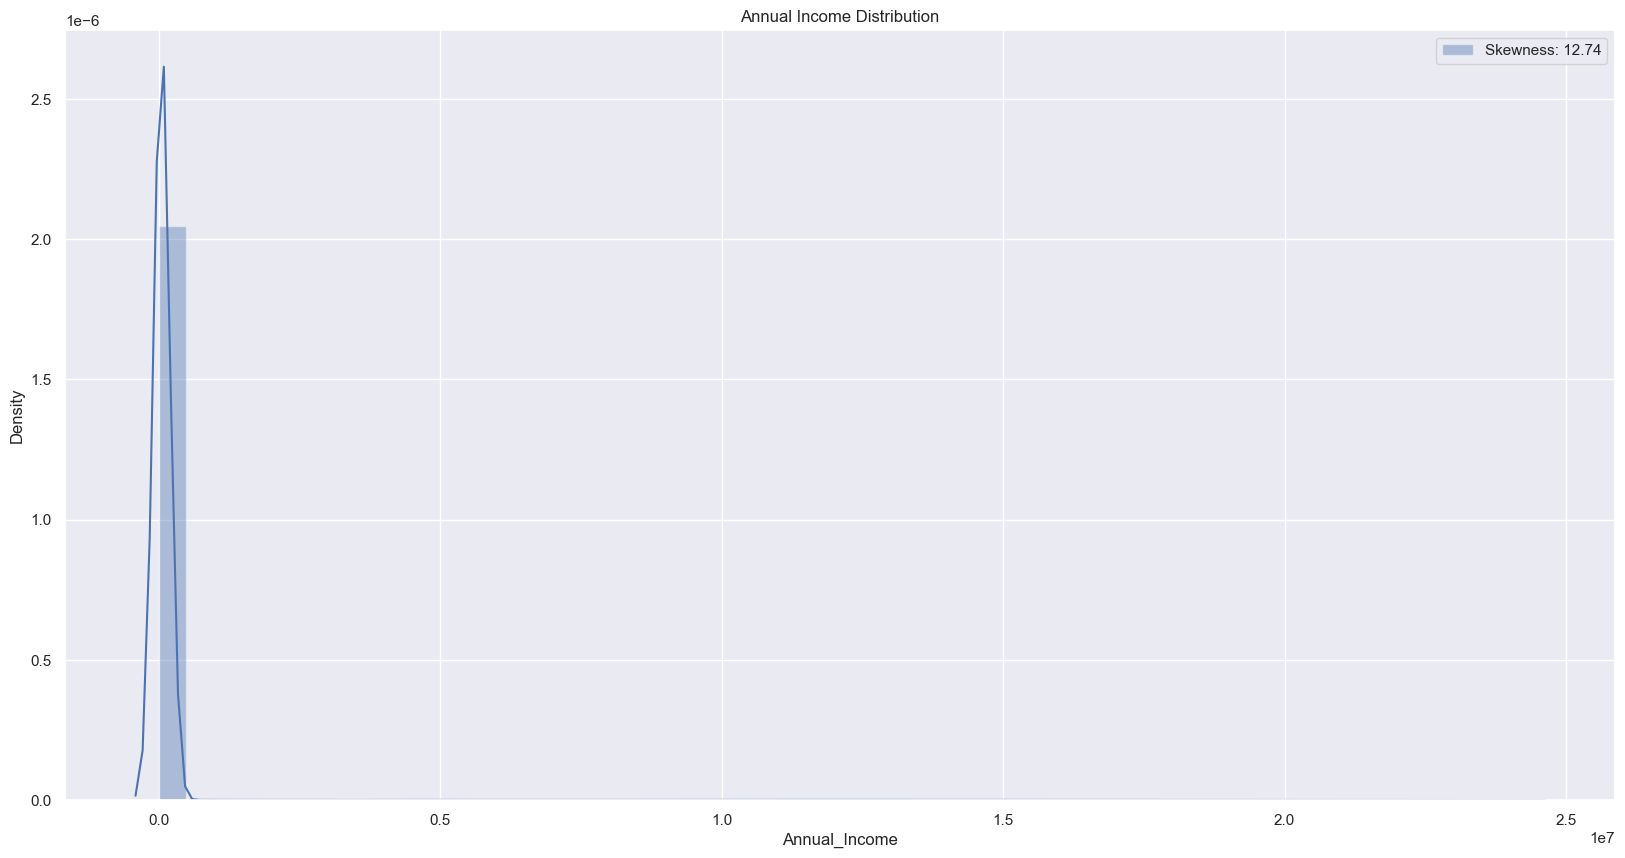

In [83]:
### Understanding the distribution of the column - Outstanding_Debt

sns.distplot(df['Annual_Income'], label = 'Skewness: %.2f'%(df['Annual_Income'].skew()))
plt.legend(loc = 'best')
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Annual Income Distribution')

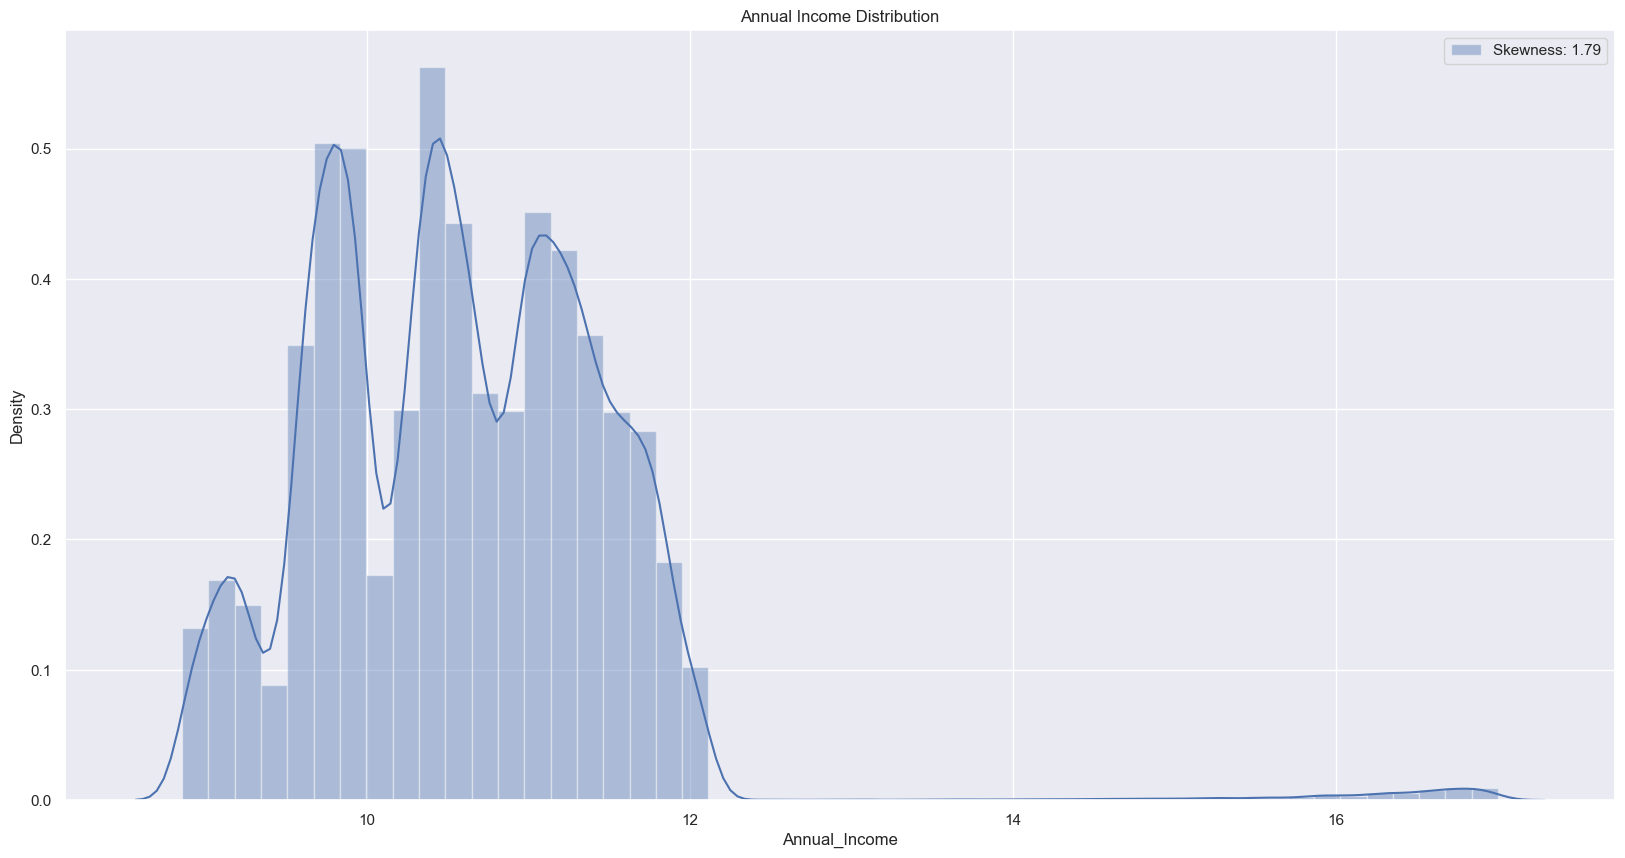

In [84]:
### Understanding the distribution of the data log(Amount_invested_monthly)

modified_annual_income = [np.log(amount) if amount > 0 else 0 for amount in df['Annual_Income']]
df['Annual_Income'] = modified_annual_income

sns.distplot(df['Annual_Income'], label = 'Skewness: %.2f'%(df['Annual_Income'].skew()))
plt.legend(loc = 'best')
plt.title('Annual Income Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.8 Log Transforming the column - Monthly_Balance

Text(0.5, 1.0, 'Monthly Balance Distribution')

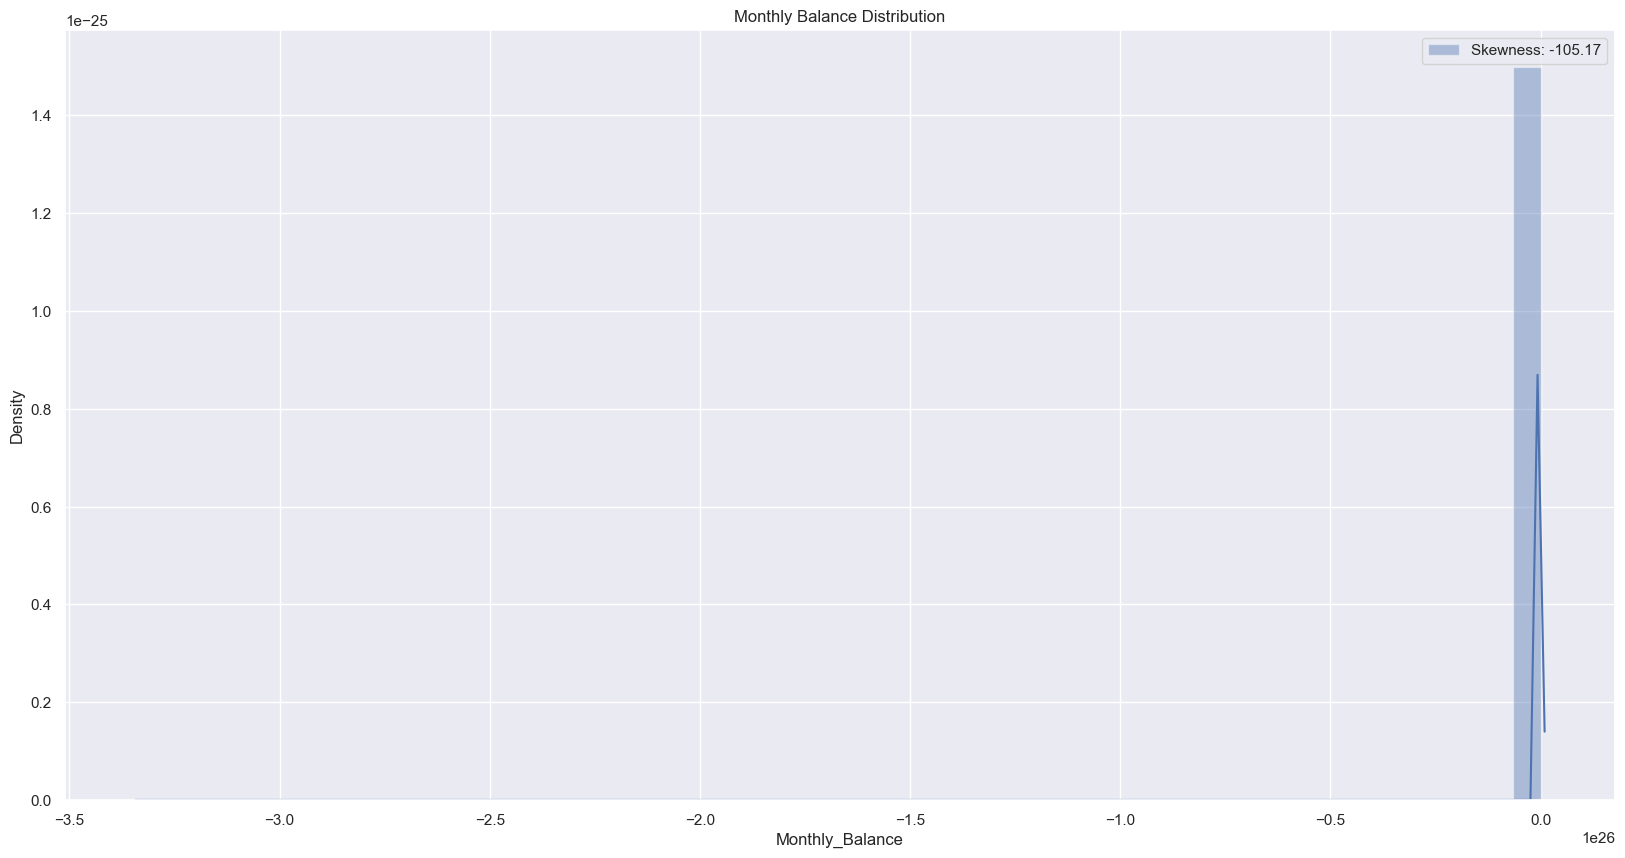

In [85]:
### Understanding the distribution of the column - Outstanding_Debt

sns.distplot(df['Monthly_Balance'], label = 'Skewness: %.2f'%(df['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Monthly Balance Distribution')

Text(0.5, 1.0, 'Monthly Balance monthly Distribution')

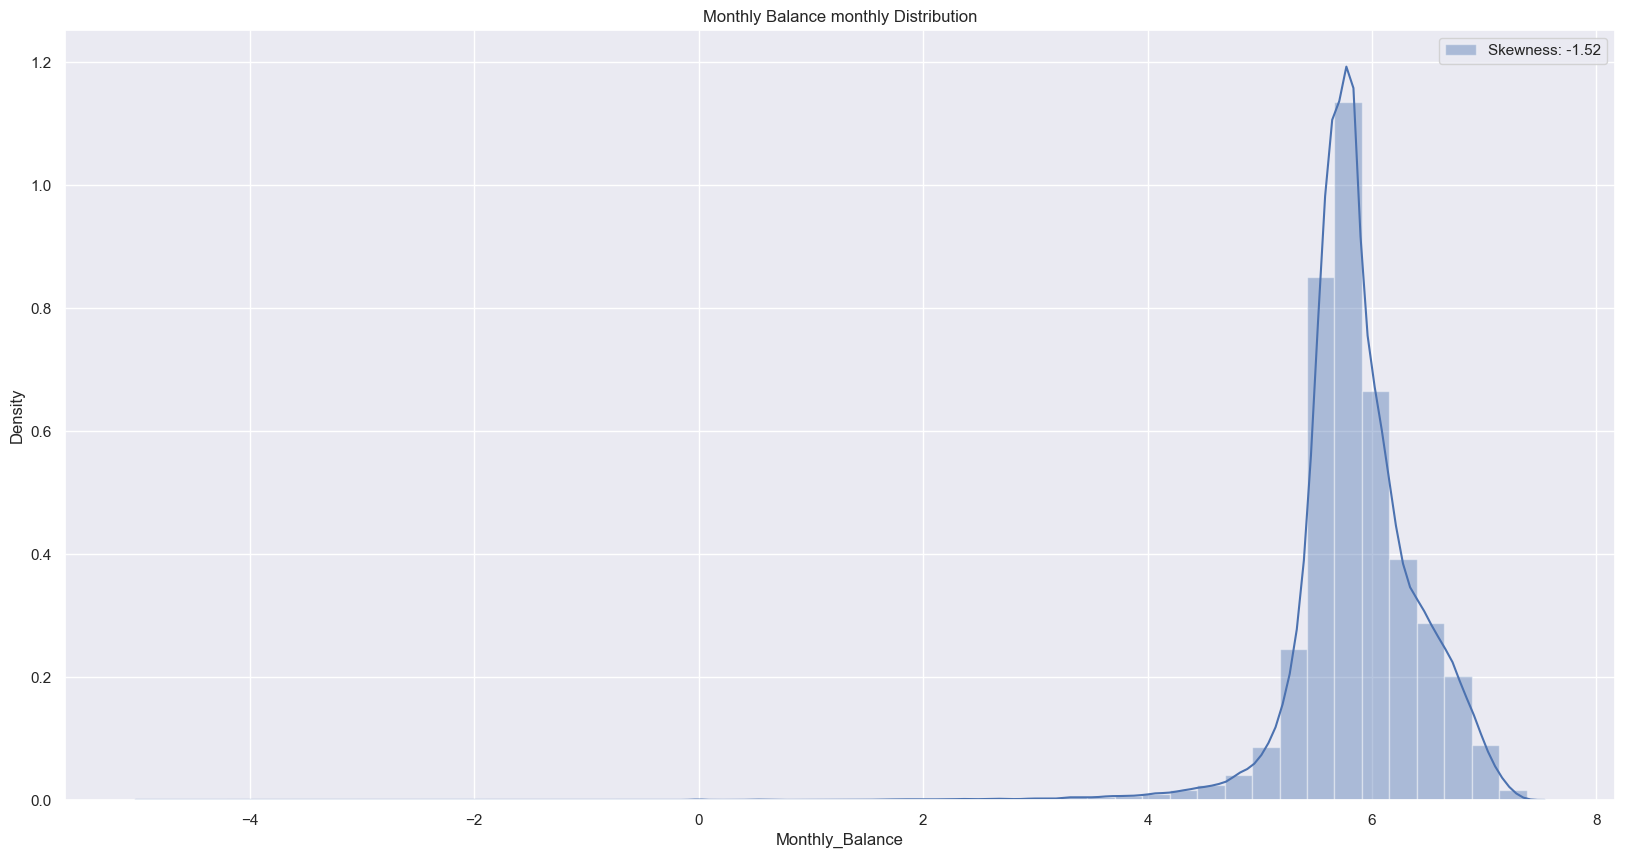

In [86]:
### Understanding the distribution of the data log(Amount_invested_monthly)

modified_monthly_income = [np.log(amount) if amount > 0 else 0 for amount in df['Monthly_Balance']]
df['Monthly_Balance'] = modified_monthly_income

sns.distplot(df['Monthly_Balance'], label = 'Skewness: %.2f'%(df['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Monthly Balance monthly Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

#### 4.5 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

In [87]:
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [88]:
ord_encoder = OrdinalEncoder()
ordencoded = pd.DataFrame(ord_encoder.fit_transform(df[['Occupation']]))
ordencoded.rename(columns = {0:'Occupation'}, inplace = True)

In [89]:
dummy = pd.get_dummies(data=df['Payment_of_Min_Amount'],drop_first=True,prefix='pay_min_amt')
dummy.head()

,pay_min_amt_No,pay_min_amt_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [90]:
data = pd.concat([dummy, ordencoded], axis = 1)
data.reset_index(drop=True,inplace=True)
data.head()

,pay_min_amt_No,pay_min_amt_Yes,Occupation
0,1,0,12.0
1,1,0,12.0
2,1,0,12.0
3,1,0,12.0
4,1,0,12.0


In [91]:
df.drop(columns=['Occupation','Payment_of_Min_Amount'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [92]:
df2 = pd.concat([df, data], axis = 1)

In [93]:
pd.set_option('display.max_columns',None)

In [94]:
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].map({'Low_spent_Small_value_payments':0,
                                                         'Low_spent_Medium_value_payments':1,
                                                         'Low_spent_Large_value_payments':2,
                                                         'High_spent_Small_value_payments':3,
                                                         'High_spent_Medium_value_payments':4,
                                                         'High_spent_Large_value_payments':5})

In [95]:
df2['Credit_Mix'] = df2['Credit_Mix'].replace({'Bad':0, 'Standard':1, 'Good':2})

In [96]:
df2.drop('Credit_History_Age',axis=1,inplace=True)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99578 entries, 0 to 99577
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     99578 non-null  int64  
 1   Age                       99578 non-null  float64
 2   Annual_Income             99578 non-null  float64
 3   Monthly_Inhand_Salary     99578 non-null  float64
 4   Num_Bank_Accounts         99578 non-null  int64  
 5   Num_Credit_Card           99578 non-null  int64  
 6   Interest_Rate             99578 non-null  float64
 7   Delay_from_due_date       99578 non-null  int64  
 8   Num_of_Delayed_Payment    99578 non-null  float64
 9   Changed_Credit_Limit      99578 non-null  float64
 10  Num_Credit_Inquiries      99578 non-null  float64
 11  Credit_Mix                99578 non-null  int64  
 12  Outstanding_Debt          99578 non-null  float64
 13  Credit_Utilization_Ratio  99578 non-null  float64
 14  Total_

In [98]:
### Encoding the Credit Score (Target) column

credit_score_data = df2['Credit_Score']
target = []

for each_credit_score in credit_score_data:
    if each_credit_score == 'Good':
        target.append(2)
    elif each_credit_score == 'Standard':
        target.append(1)
    else:
        target.append(0)

### Removing the Credit Score column

df2.drop(['Credit_Score'], axis = 1, inplace = True)

### Adding the Target column

df2['Target'] = target

In [99]:
df2.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,pay_min_amt_No,pay_min_amt_Yes,Occupation,Target
0,1,23.0,9.858183,7.508787,3,4,1.098612,3,1.945910,11.27,1.386294,2,809.98,26.822620,3.903486,4.387204,3,5.744586,1,1,1,1,0,0,0,0,1,0,12.0,2
1,2,23.0,9.858183,8.590258,3,4,1.098612,-1,2.639057,11.27,1.386294,2,809.98,31.944960,3.903486,4.773057,2,5.651187,1,1,1,1,0,0,0,0,1,0,12.0,2
2,3,23.0,9.858183,8.590258,3,4,1.098612,3,1.945910,6.27,1.386294,2,809.98,28.609352,3.903486,4.403048,1,5.802752,1,1,1,1,0,0,0,0,1,0,12.0,2
3,4,23.0,9.858183,8.590258,3,4,1.098612,5,1.386294,6.27,1.386294,2,809.98,31.377862,3.903486,5.295604,0,5.409194,1,1,1,1,0,0,0,0,1,0,12.0,2
4,5,23.0,9.858183,7.508787,3,4,1.098612,6,2.639057,11.27,1.386294,2,809.98,24.797347,3.903486,3.723768,4,5.833316,1,1,1,1,0,0,0,0,1,0,12.0,2


### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Credit Score detection is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

1. Logistic regression
2. Support vector classification
3. K-nearest neighbours
4. Naive Bayes
5. Decision tree
6. Random forest

Here, we will only be focusing on the data belonging to Good and Poor credit scores.

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

#### 5.1 Splitting the Training Data

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [134]:
### Splitting the data to the matrices X and Y using the training set.

X = df2.iloc[:, : -1].values
Y = df2.iloc[:, -1].values

In [135]:
### Looking at the new training data - X

X

array([[ 1.        , 23.        ,  9.85818261, ...,  1.        ,
         0.        , 12.        ],
       [ 2.        , 23.        ,  9.85818261, ...,  1.        ,
         0.        , 12.        ],
       [ 3.        , 23.        ,  9.85818261, ...,  1.        ,
         0.        , 12.        ],
       ...,
       [ 5.        , 25.        , 10.5873162 , ...,  1.        ,
         0.        ,  9.        ],
       [ 6.        , 25.        , 10.5873162 , ...,  1.        ,
         0.        ,  9.        ],
       [ 7.        , 25.        , 10.5873162 , ...,  1.        ,
         0.        ,  9.        ]])

In [136]:
### Looking at the new test data - Y

Y

array([2, 2, 2, ..., 0, 0, 1], dtype=int64)

In [137]:
### Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27,shuffle=True)

In [138]:
X_train

array([[ 8.        , 31.        , 10.92707991, ...,  0.        ,
         1.        , 10.        ],
       [ 8.        , 42.        ,  9.18963448, ...,  0.        ,
         1.        ,  0.        ],
       [ 8.        , 31.        , 10.35829727, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 2.        , 15.        , 10.77378419, ...,  0.        ,
         0.        , 11.        ],
       [ 2.        , 30.        , 11.24902138, ...,  0.        ,
         1.        , 14.        ],
       [ 8.        , 18.        ,  9.71307314, ...,  0.        ,
         1.        , 13.        ]])

In [139]:
X_test

array([[ 1.        , 54.        , 10.5795786 , ...,  0.        ,
         0.        ,  0.        ],
       [ 8.        , 21.        , 11.54747674, ...,  0.        ,
         0.        ,  4.        ],
       [ 3.        , 44.        , 11.72408777, ...,  1.        ,
         0.        ,  9.        ],
       ...,
       [ 3.        , 38.        , 10.11493618, ...,  1.        ,
         0.        ,  8.        ],
       [ 5.        , 27.        , 10.57022248, ...,  0.        ,
         0.        ,  5.        ],
       [ 6.        , 37.        ,  9.22908705, ...,  0.        ,
         1.        ,  4.        ]])

In [140]:
Y_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [141]:
Y_test

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

#### 5.2 Fit Model

In [142]:
### Dictionary to store model and its train accuracy

model_train_accuracy = OrderedDict()

In [143]:
### Dictionary to store model and its test accuracy

model_accuracy = OrderedDict()

In [144]:
### Dictionary to store model and its precision

model_precision = OrderedDict()

In [145]:
### Dictionary to store model and its recall

model_recall = OrderedDict()

In [146]:
### Dictionary to store model and its f1-score

model_f1score = OrderedDict()

##### 5.2.1 Applying Logistic Regression

In [147]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [148]:
Y_predtr = logistic_classifier.predict(X_train)

In [149]:
### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predtr)
print(cm)

### Printing the accuracy, precision, and recall of the model

log_accuracy = round(100 * accuracy_score(Y_train, Y_predtr), 2)
model_train_accuracy['Logistic Regression'] = log_accuracy

print('The accuracy of this model is {} %.'.format(log_accuracy))

[[ 8208 11597   423]
 [ 4535 30322  2129]
 [  189  9739  2562]]
The accuracy of this model is 58.95 %.


In [150]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [1 2]
 [2 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [151]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)

### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

logistic_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Logistic Regression'] = logistic_f1

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))
print('The f1-score of this model is {} %.'.format(logistic_f1))

[[ 3592  4801   201]
 [ 1965 13052   976]
 [   69  4126  1092]]
The accuracy of this model is 59.37 %.
The precision of this model is 58.68 %.
The recall of this model is 59.37 %.
The f1-score of this model is 56.45 %.


##### 5.2.2 Applying Recursive Feature Elimination (RFE)

In [152]:
# # set of independent variables
# # drop the target variable using 'drop()'
# # 'axis = 1' drops the specified column
X1 = df2.drop('Target', axis = 1)
 # consider the dependent variable
y1 = df2['Target']

# # split data into train subset and test subset
# # set 'random_state' to generate the same dataset each time you run the code 
# # 'test_size' returns the proportion of data to be included in the testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
logreg_rfe = LogisticRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=logreg_rfe, n_features_to_select = 10)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X1_train, y1_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X1_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Payment_Behaviour', 'Monthly_Balance', 'pay_min_amt_No',
       'pay_min_amt_Yes'],
      dtype='object')


In [153]:
xrfe = df2[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Payment_Behaviour', 'Monthly_Balance', 'pay_min_amt_No',
       'pay_min_amt_Yes']]
yrfe = df2['Target']

In [154]:
Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(xrfe, yrfe, test_size = 0.20, random_state = 10)

In [155]:
logreg_rfe = LogisticRegression(random_state = 27)
logreg_rfe.fit(Xrfe_train, yrfe_train)

LogisticRegression(random_state=27)

In [156]:
Ytr_predrfe = logreg_rfe.predict(Xrfe_train)

### Making the confusion matrix

cm = confusion_matrix(yrfe_train, Ytr_predrfe)
print(cm)

### Printing the accuracy, precision, and recall of the model

logrfe_accuracy = round(100 * accuracy_score(yrfe_train, Ytr_predrfe), 2)
model_train_accuracy['Logistic Regression using RFE'] = logrfe_accuracy

print('The accuracy of this model is {} %.'.format(logrfe_accuracy))

[[ 7963 13596  1505]
 [ 6299 32385  3730]
 [  432  8016  5736]]
The accuracy of this model is 57.85 %.


In [157]:
### Predicting the Test set results

Y_predrfe = logreg_rfe.predict(Xrfe_test)

### Making the confusion matrix

cm = confusion_matrix(yrfe_test, Y_predrfe)
print(cm)

### Printing the accuracy, precision, and recall of the model

logrfe_accuracy = round(100 * accuracy_score(yrfe_test, Y_predrfe), 2)
model_accuracy['Logistic Regression using RFE'] = logrfe_accuracy

logrfe_precision = round(100 * precision_score(yrfe_test, Y_predrfe, average = 'weighted'), 2)
model_precision['Logistic Regression using RFE'] = logrfe_precision

logrfe_recall = round(100 * recall_score(yrfe_test, Y_predrfe, average = 'weighted'), 2)
model_recall['Logistic Regression using RFE'] = logrfe_recall

logrfe_f1 = round(100 * f1_score(yrfe_test, Y_predrfe, average = 'weighted'), 2)
model_f1score['Logistic Regression using RFE'] = logrfe_f1

print('The accuracy of this model is {} %.'.format(logrfe_accuracy))
print('The precision of this model is {} %.'.format(logrfe_precision))
print('The recall of this model is {} %.'.format(logrfe_recall))
print('The f1-score of this model is {} %.'.format(logrfe_f1))

[[2005 3369  384]
 [1535 8156  874]
 [ 124 2028 1441]]
The accuracy of this model is 58.25 %.
The precision of this model is 57.38 %.
The recall of this model is 58.25 %.
The f1-score of this model is 56.45 %.


##### 5.2.3 Applying K-Nearest Neighbors (k = 1)

In [158]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [159]:
Y_pred1nn = classifier_1nn.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_pred1nn)
print(cm)

### Printing the accuracy, precision, and recall of the model

knn1_accuracy = round(100 * accuracy_score(Y_train, Y_pred1nn), 2)
model_train_accuracy['K-Nearest Neighbors (k = 1)'] = knn1_accuracy

print('The accuracy of this model is {} %.'.format(knn1_accuracy))

[[20228     0     0]
 [    0 36986     0]
 [    0     0 12490]]
The accuracy of this model is 100.0 %.


In [160]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [1 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [161]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K-Nearest Neighbors (k = 1)'] = nn1_accuracy

nn1_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['K-Nearest Neighbors (k = 1)'] = nn1_precision

nn1_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['K-Nearest Neighbors (k = 1)'] = nn1_recall

nn1_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['K-Nearest Neighbors (k = 1)'] = nn1_f1

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))
print('The f1-score of this model is {} %.'.format(nn1_f1))

[[ 6561  1964    69]
 [ 2095 12351  1547]
 [   61  1534  3692]]
The accuracy of this model is 75.66 %.
The precision of this model is 75.68 %.
The recall of this model is 75.66 %.
The f1-score of this model is 75.67 %.


##### 5.2.4 Applying K - Nearest Neighbors (k = 3)

In [162]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [163]:
#Training data
Y_pred3nn = classifier_3nn.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_pred3nn)
print(cm)

### Printing the accuracy, precision, and recall of the model

knn3_accuracy = round(100 * accuracy_score(Y_train, Y_pred3nn), 2)
model_train_accuracy['K-Nearest Neighbors (k = 3)'] = knn3_accuracy

print('The accuracy of this model is {} %.'.format(knn3_accuracy))

[[18396  1789    43]
 [ 3156 32116  1714]
 [  258  1712 10520]]
The accuracy of this model is 87.56 %.


In [164]:
### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [1 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [165]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K-Nearest Neighbors (k = 3)'] = nn3_accuracy

nn3_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['K-Nearest Neighbors (k = 3)'] = nn3_precision

nn3_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['K-Nearest Neighbors (k = 3)'] = nn3_recall

nn3_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['K-Nearest Neighbors (k = 3)'] = nn3_f1

print('The accuracy of this model is {} %.'.format(nn3_accuracy))
print('The precision of this model is {} %.'.format(nn3_precision))
print('The recall of this model is {} %.'.format(nn3_recall))
print('The f1-score of this model is {} %.'.format(nn3_f1))

[[ 6788  1738    68]
 [ 2328 12202  1463]
 [  185  1579  3523]]
The accuracy of this model is 75.36 %.
The precision of this model is 75.42 %.
The recall of this model is 75.36 %.
The f1-score of this model is 75.34 %.


In [217]:
# #Hyper parameter tuning using GridSearchCV

# tuned_paramaters = [{'n_neighbors' : [1,3,5,7,11],
#                       'p' : [1,2], 
#                      'metric' : ['minkowski','euclidean']}]

# knn = KNeighborsClassifier()
# knncv = GridSearchCV(knn,tuned_paramaters,scoring='accuracy')

# knn_model = knncv.fit(X_train, Y_train)

# print('Best parameters for KNN: ', knn_model.best_params_, '\n')

##### 5.2.5 Applying K - Nearest Neighbors (k = 5)

In [166]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [183]:
#Training data
Y_pred5nn = classifier_5nn.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_pred5nn)
print(cm)

### Printing the accuracy, precision, and recall of the model

knn5_accuracy = round(100 * accuracy_score(Y_train, Y_pred5nn), 2)
model_train_accuracy['K-Nearest Neighbors (k = 5)'] = knn5_accuracy

print('The training accuracy of this model is {} %.'.format(knn5_accuracy))

[[17625  2540    63]
 [ 3725 31347  1914]
 [  248  2839  9403]]
The training accuracy of this model is 83.75 %.


In [167]:
### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [1 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [168]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K-Nearest Neighbors (k = 5)'] = nn5_accuracy

nn5_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['K-Nearest Neighbors (k = 5)'] = nn5_precision

nn5_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['K-Nearest Neighbors (k = 5)'] = nn5_recall

nn5_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['K-Nearest Neighbors (k = 5)'] = nn5_f1

print('The accuracy of this model is {} %.'.format(nn5_accuracy))
print('The precision of this model is {} %.'.format(nn5_precision))
print('The recall of this model is {} %.'.format(nn5_recall))
print('The f1-score of this model is {} %.'.format(nn5_f1))

[[ 6668  1844    82]
 [ 2259 12436  1298]
 [  160  1944  3183]]
The accuracy of this model is 74.6 %.
The precision of this model is 74.49 %.
The recall of this model is 74.6 %.
The f1-score of this model is 74.47 %.


##### 5.2.5 Applying K - Nearest Neighbors (k = 7)

In [169]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [182]:
#Training data
Y_pred7nn = classifier_7nn.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_pred7nn)
print(cm)

### Printing the accuracy, precision, and recall of the model

knn7_accuracy = round(100 * accuracy_score(Y_train, Y_pred7nn), 2)
model_train_accuracy['K-Nearest Neighbors (k = 7)'] = knn7_accuracy

print('The training accuracy of this model is {} %.'.format(knn7_accuracy))

[[16853  3212   163]
 [ 3837 31181  1968]
 [  217  3728  8545]]
The training accuracy of this model is 81.17 %.


In [170]:
### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [1 2]
 [1 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [171]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K-Nearest Neighbors (k = 7)'] = nn7_accuracy

nn7_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['K-Nearest Neighbors (k = 7)'] = nn7_precision

nn7_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['K-Nearest Neighbors (k = 7)'] = nn7_recall

nn7_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['K-Nearest Neighbors (k = 7)'] = nn7_f1

print('The accuracy of this model is {} %.'.format(nn7_accuracy))
print('The precision of this model is {} %.'.format(nn7_precision))
print('The recall of this model is {} %.'.format(nn7_recall))
print('The f1-score of this model is {} %.'.format(nn7_f1))

[[ 6420  2027   147]
 [ 2146 12596  1251]
 [  159  2151  2977]]
The accuracy of this model is 73.62 %.
The precision of this model is 73.41 %.
The recall of this model is 73.62 %.
The f1-score of this model is 73.39 %.


Now let's plot the accuracies of all the nearest neighbor models. We can see that the accuracy first increases, reaches a peak and then decreases.

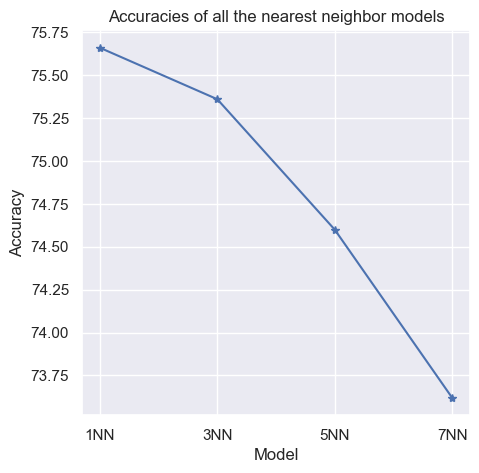

In [172]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

##### 5.2.6 Applying Gaussian Naive Bayes 

In [173]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [181]:
#Training data
Y_prednb = naive_bayes_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_prednb)
print(cm)

### Printing the accuracy, precision, and recall of the model

nb_accuracy = round(100 * accuracy_score(Y_train, Y_prednb), 2)
model_train_accuracy['Gaussian Naive Bayes'] = nb_accuracy

print('The training accuracy of this model is {} %.'.format(nb_accuracy))

[[14099  3333  2796]
 [ 8411 19605  8970]
 [  353  1541 10596]]
The training accuracy of this model is 63.55 %.


In [175]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [176]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

naive_bayes_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Gaussian Naive Bayes'] = naive_bayes_f1

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))
print('The f1-score of this model is {} %.'.format(naive_bayes_f1))

[[6042 1394 1158]
 [3616 8527 3850]
 [ 137  653 4497]]
The accuracy of this model is 63.82 %.
The precision of this model is 69.29 %.
The recall of this model is 63.82 %.
The f1-score of this model is 64.03 %.


##### 5.2.7 Applying Decision Tree Classification

In [177]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [180]:
#Training data
Y_preddt = decision_tree_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_preddt)
print(cm)

### Printing the accuracy, precision, and recall of the model

dt_accuracy = round(100 * accuracy_score(Y_train, Y_preddt), 2)
model_train_accuracy['Decision Tree'] = dt_accuracy

print('The training accuracy of this model is {} %.'.format(dt_accuracy))

[[20228     0     0]
 [    0 36986     0]
 [    0     0 12490]]
The training accuracy of this model is 100.0 %.


In [178]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [179]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree'] = decision_tree_accuracy

decision_tree_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Decision Tree'] = decision_tree_precision

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Decision Tree'] = decision_tree_recall

decision_tree_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Decision Tree'] = decision_tree_f1

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))
print('The f1-score of this model is {} %.'.format(decision_tree_f1))

[[ 6433  1967   194]
 [ 1877 12857  1259]
 [  210  1252  3825]]
The accuracy of this model is 77.37 %.
The precision of this model is 77.36 %.
The recall of this model is 77.37 %.
The f1-score of this model is 77.37 %.


##### 5.2.8 Applying Random Forest Classification (10 trees)

In [184]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [185]:
#Training data
Y_predrf10 = random_forest_10_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predrf10)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf10_accuracy = round(100 * accuracy_score(Y_train, Y_predrf10), 2)
model_train_accuracy['Random Forest (10 trees)'] = rf10_accuracy

print('The training accuracy of this model is {} %.'.format(rf10_accuracy))

[[20151    69     8]
 [  310 36626    50]
 [    9   166 12315]]
The training accuracy of this model is 99.12 %.


In [186]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [187]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (10 trees)'] = random_forest_10_accuracy

random_forest_10_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (10 trees)'] = random_forest_10_precision

random_forest_10_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (10 trees)'] = random_forest_10_recall

random_forest_10_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Random Forest (10 trees)'] = random_forest_10_f1

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The precision of this model is {} %.'.format(random_forest_10_precision))
print('The recall of this model is {} %.'.format(random_forest_10_recall))
print('The f1-score of this model is {} %.'.format(random_forest_10_f1))

[[ 7164  1169   261]
 [ 1842 13081  1070]
 [  100  1274  3913]]
The accuracy of this model is 80.87 %.
The precision of this model is 80.95 %.
The recall of this model is 80.87 %.
The f1-score of this model is 80.88 %.


##### 5.2.9 Applying Random Forest Classification (25 trees)

In [188]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [189]:
#Training data
Y_predrf25 = random_forest_25_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predrf25)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf25_accuracy = round(100 * accuracy_score(Y_train, Y_predrf25), 2)
model_train_accuracy['Random Forest (25 trees)'] = rf25_accuracy

print('The training accuracy of this model is {} %.'.format(rf25_accuracy))

[[20213    15     0]
 [   21 36954    11]
 [    0    14 12476]]
The training accuracy of this model is 99.91 %.


In [190]:
### Predicting the Test set results

Y_pred25 = random_forest_25_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [191]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred25)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (25 trees)'] = random_forest_25_accuracy

random_forest_25_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (25 trees)'] = random_forest_25_precision

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (25 trees)'] = random_forest_25_recall

random_forest_25_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Random Forest (25 trees)'] = random_forest_25_f1


print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The precision of this model is {} %.'.format(random_forest_25_precision))
print('The recall of this model is {} %.'.format(random_forest_25_recall))
print('The f1-score of this model is {} %.'.format(random_forest_25_f1))

[[ 7220  1145   229]
 [ 1516 13386  1091]
 [   56   966  4265]]
The accuracy of this model is 80.87 %.
The precision of this model is 80.95 %.
The recall of this model is 80.87 %.
The f1-score of this model is 80.88 %.


##### 5.2.10 Applying Random Forest Classification (50 trees)

In [192]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [193]:
#Training data
Y_predrf50 = random_forest_50_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predrf50)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf50_accuracy = round(100 * accuracy_score(Y_train, Y_predrf50), 2)
model_train_accuracy['Random Forest (50 trees)'] = rf50_accuracy

print('The training accuracy of this model is {} %.'.format(rf50_accuracy))

[[20228     0     0]
 [    3 36983     0]
 [    0     2 12488]]
The training accuracy of this model is 99.99 %.


In [194]:
### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [195]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (50 trees)'] = random_forest_50_accuracy

random_forest_50_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (50 trees)'] = random_forest_50_precision

random_forest_50_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (50 trees)'] = random_forest_50_recall

random_forest_50_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Random Forest (50 trees)'] = random_forest_50_f1

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The precision of this model is {} %.'.format(random_forest_50_precision))
print('The recall of this model is {} %.'.format(random_forest_50_recall))
print('The f1-score of this model is {} %.'.format(random_forest_50_f1))

[[ 7291  1081   222]
 [ 1462 13432  1099]
 [   55   864  4368]]
The accuracy of this model is 83.99 %.
The precision of this model is 84.16 %.
The recall of this model is 83.99 %.
The f1-score of this model is 84.04 %.


##### 5.2.11 Applying Random Forest Classification (100 trees)

In [196]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [197]:
#Training data
Y_predrf100 = random_forest_100_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predrf100)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf100_accuracy = round(100 * accuracy_score(Y_train, Y_predrf100), 2)
model_train_accuracy['Random Forest (100 trees)'] = rf100_accuracy

print('The training accuracy of this model is {} %.'.format(rf100_accuracy))

[[20228     0     0]
 [    0 36986     0]
 [    0     0 12490]]
The training accuracy of this model is 100.0 %.


In [198]:
### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [199]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (100 trees)'] = random_forest_100_accuracy

random_forest_100_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (100 trees)'] = random_forest_100_precision

random_forest_100_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (100 trees)'] = random_forest_100_recall

random_forest_100_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Random Forest (100 trees)'] = random_forest_100_f1

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The precision of this model is {} %.'.format(random_forest_100_precision))
print('The recall of this model is {} %.'.format(random_forest_100_recall))
print('The f1-score of this model is {} %.'.format(random_forest_100_f1))

[[ 7288  1064   242]
 [ 1437 13473  1083]
 [   42   842  4403]]
The accuracy of this model is 84.23 %.
The precision of this model is 84.42 %.
The recall of this model is 84.23 %.
The f1-score of this model is 84.28 %.


##### 5.2.12 Applying Stacking Classifier

In [200]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('KNN (N=5)', classifier_5nn))
base_models.append(('Naive Bayes', naive_bayes_classifier))
base_models.append(('random_forest_10', random_forest_10_classifier))

### Define the meta models

meta_model = logistic_classifier

In [201]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('KNN (N=5)', KNeighborsClassifier()),
                               ('Naive Bayes', GaussianNB()),
                               ('random_forest_10',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=10,
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [202]:
#Training data
Y_predsc = stacking_classifier.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predsc)
print(cm)

### Printing the accuracy, precision, and recall of the model

sc_accuracy = round(100 * accuracy_score(Y_train, Y_predsc), 2)
model_train_accuracy['Stacking Classification'] = sc_accuracy

print('The training accuracy of this model is {} %.'.format(sc_accuracy))

[[20072   154     2]
 [  295 36506   185]
 [    3   113 12374]]
The training accuracy of this model is 98.92 %.


In [203]:
### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [204]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

stacking_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Stacking Classification'] = stacking_accuracy

stacking_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Stacking Classification'] = stacking_precision

stacking_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Stacking Classification'] = stacking_recall

stacking_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['Stacking Classification'] = stacking_f1

print('The accuracy of this model is {} %.'.format(stacking_accuracy))
print('The precision of this model is {} %.'.format(stacking_precision))
print('The recall of this model is {} %.'.format(stacking_recall))
print('The f1-score of this model is {} %.'.format(stacking_f1))

[[ 7172  1332    90]
 [ 1504 13479  1010]
 [   18  1131  4138]]
The accuracy of this model is 82.98 %.
The precision of this model is 82.98 %.
The recall of this model is 82.98 %.
The f1-score of this model is 82.98 %.


##### 5.2.13 AdaBoost Classifier

In [205]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [206]:
#Training data
Y_predab = ada_model.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predab)
print(cm)

### Printing the accuracy, precision, and recall of the model

ab_accuracy = round(100 * accuracy_score(Y_train, Y_predab), 2)
model_train_accuracy['AdaBoostClassifier'] = ab_accuracy

print('The training accuracy of this model is {} %.'.format(ab_accuracy))

[[11766  6782  1680]
 [ 3519 29692  3775]
 [  158  3872  8460]]
The training accuracy of this model is 71.61 %.


In [207]:
### Predicting the Test set results

Y_pred = ada_model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [1 0]
 [0 0]
 [1 0]]


In [208]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

adaboost_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['AdaBoostClassifier'] = adaboost_accuracy

adaboost_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['AdaBoostClassifier'] = adaboost_precision

adaboost_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['AdaBoostClassifier'] = adaboost_recall

adaboost_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['AdaBoostClassifier'] = adaboost_f1

print('The accuracy of this model is {} %.'.format(adaboost_accuracy))
print('The precision of this model is {} %.'.format(adaboost_precision))
print('The recall of this model is {} %.'.format(adaboost_recall))
print('The f1-score of this model is {} %.'.format(adaboost_f1))

[[ 5035  2857   702]
 [ 1525 12821  1647]
 [   66  1680  3541]]
The accuracy of this model is 71.62 %.
The precision of this model is 72.04 %.
The recall of this model is 71.62 %.
The f1-score of this model is 71.41 %.


##### 5.2.14 XGBoost Classifier

In [209]:
### Applying XGBoost Classification model 

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [210]:
#Training data
Y_predxgb = xgb_model.predict(X_train)

### Making the confusion matrix

cm = confusion_matrix(Y_train, Y_predxgb)
print(cm)

### Printing the accuracy, precision, and recall of the model

xgb_accuracy = round(100 * accuracy_score(Y_train, Y_predxgb), 2)
model_train_accuracy['xgb_model'] = xgb_accuracy

print('The training accuracy of this model is {} %.'.format(xgb_accuracy))

[[19650   545    33]
 [  893 35743   350]
 [    0   284 12206]]
The training accuracy of this model is 96.98 %.


In [211]:
### Predicting the Test set results

Y_pred = xgb_model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [212]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

xgb_model_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['xgb_model'] = xgb_model_accuracy

xgb_model_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['xgb_model'] = xgb_model_precision

xgb_model_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['xgb_model'] = xgb_model_recall

xgb_model_f1 = round(100 * f1_score(Y_test, Y_pred, average = 'weighted'), 2)
model_f1score['xgb_model'] = xgb_model_f1

print('The accuracy of this model is {} %.'.format(xgb_model_accuracy))
print('The precision of this model is {} %.'.format(xgb_model_precision))
print('The recall of this model is {} %.'.format(xgb_model_recall))
print('The f1-score of this model is {} %.'.format(xgb_model_f1))

[[ 7211  1198   185]
 [ 1383 13596  1014]
 [   37   847  4403]]
The accuracy of this model is 84.39 %.
The precision of this model is 84.48 %.
The recall of this model is 84.39 %.
The f1-score of this model is 84.42 %.


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 Training accuracy of the models

Now we will tabulate all the models along with their accuracies. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [213]:
### Looking at the model train accuracy dictionary

model_train_accuracy

OrderedDict([('Logistic Regression', 58.95),
             ('Logistic Regression using RFE', 57.85),
             ('K-Nearest Neighbors (k = 1)', 100.0),
             ('K-Nearest Neighbors (k = 3)', 87.56),
             ('Gaussian Naive Bayes', 63.55),
             ('Decision Tree', 100.0),
             ('K-Nearest Neighbors (k = 7)', 81.17),
             ('K-Nearest Neighbors (k = 5)', 83.75),
             ('Random Forest (10 trees)', 99.12),
             ('Random Forest (25 trees)', 99.91),
             ('Random Forest (50 trees)', 99.99),
             ('Random Forest (100 trees)', 100.0),
             ('Stacking Classification', 98.92),
             ('AdaBoostClassifier', 71.61),
             ('xgb_model', 96.98)])

In [214]:
### Looking at the model accuracy dictionary
model_accuracy

OrderedDict([('Logistic Regression', 59.37),
             ('Logistic Regression using RFE', 58.25),
             ('K-Nearest Neighbors (k = 1)', 75.66),
             ('K-Nearest Neighbors (k = 3)', 75.36),
             ('K-Nearest Neighbors (k = 5)', 74.6),
             ('K-Nearest Neighbors (k = 7)', 73.62),
             ('Gaussian Naive Bayes', 63.82),
             ('Decision Tree', 77.37),
             ('Random Forest (10 trees)', 80.87),
             ('Random Forest (25 trees)', 80.87),
             ('Random Forest (50 trees)', 83.99),
             ('Random Forest (100 trees)', 84.23),
             ('Stacking Classification', 82.98),
             ('AdaBoostClassifier', 71.62),
             ('xgb_model', 84.39)])

In [215]:
### Looking at the model precision dictionary

model_precision

OrderedDict([('Logistic Regression', 58.68),
             ('Logistic Regression using RFE', 57.38),
             ('K-Nearest Neighbors (k = 1)', 75.68),
             ('K-Nearest Neighbors (k = 3)', 75.42),
             ('K-Nearest Neighbors (k = 5)', 74.49),
             ('K-Nearest Neighbors (k = 7)', 73.41),
             ('Gaussian Naive Bayes', 69.29),
             ('Decision Tree', 77.36),
             ('Random Forest (10 trees)', 80.95),
             ('Random Forest (25 trees)', 80.95),
             ('Random Forest (50 trees)', 84.16),
             ('Random Forest (100 trees)', 84.42),
             ('Stacking Classification', 82.98),
             ('AdaBoostClassifier', 72.04),
             ('xgb_model', 84.48)])

In [216]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 59.37),
             ('Logistic Regression using RFE', 58.25),
             ('K-Nearest Neighbors (k = 1)', 75.66),
             ('K-Nearest Neighbors (k = 3)', 75.36),
             ('K-Nearest Neighbors (k = 5)', 74.6),
             ('K-Nearest Neighbors (k = 7)', 73.62),
             ('Gaussian Naive Bayes', 63.82),
             ('Decision Tree', 77.37),
             ('Random Forest (10 trees)', 80.87),
             ('Random Forest (25 trees)', 80.87),
             ('Random Forest (50 trees)', 83.99),
             ('Random Forest (100 trees)', 84.23),
             ('Stacking Classification', 82.98),
             ('AdaBoostClassifier', 71.62),
             ('xgb_model', 84.39)])

In [217]:
### Looking at the model f1-score dictionary

model_f1score

OrderedDict([('Logistic Regression', 56.45),
             ('Logistic Regression using RFE', 56.45),
             ('K-Nearest Neighbors (k = 1)', 75.67),
             ('K-Nearest Neighbors (k = 3)', 75.34),
             ('K-Nearest Neighbors (k = 5)', 74.47),
             ('K-Nearest Neighbors (k = 7)', 73.39),
             ('Gaussian Naive Bayes', 64.03),
             ('Decision Tree', 77.37),
             ('Random Forest (10 trees)', 80.88),
             ('Random Forest (25 trees)', 80.88),
             ('Random Forest (50 trees)', 84.04),
             ('Random Forest (100 trees)', 84.28),
             ('Stacking Classification', 82.98),
             ('AdaBoostClassifier', 71.41),
             ('xgb_model', 84.42)])

In [218]:
### Tabulating the results

table = []
table.append(['Sl.No.', 'Classification Model', 'Train Accuracy', 'Test Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_train_accuracy[model],model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════╤═══════════════════════════════╤══════════════════╤═════════════════╤═══════════════════╤════════════════╕
│   Sl.No. │ Classification Model          │   Train Accuracy │   Test Accuracy │   Model Precision │   Model Recall │
╞══════════╪═══════════════════════════════╪══════════════════╪═════════════════╪═══════════════════╪════════════════╡
│        1 │ Logistic Regression           │            58.95 │           59.37 │             58.68 │          59.37 │
├──────────┼───────────────────────────────┼──────────────────┼─────────────────┼───────────────────┼────────────────┤
│        2 │ Logistic Regression using RFE │            57.85 │           58.25 │             57.38 │          58.25 │
├──────────┼───────────────────────────────┼──────────────────┼─────────────────┼───────────────────┼────────────────┤
│        3 │ K-Nearest Neighbors (k = 1)   │           100    │           75.66 │             75.68 │          75.66 │
├──────────┼───────────────────────────────┼────

From the above table, we can see that XGBoost Classifier has the highest model accuracy of 84.39% among all the other models. It also has the highest precision of 84.48% and highest recall of 84.39%.

### 6. Conclusion

Our final model will be XGBoost Classifier model, which has good train accuracy and also top test accuracy of 84.39% when compared to other models.
xgb_model also has high precision and high recall value in comparison with others.

In [100]:
df2.to_csv('deploy_credit1.csv')